## Problem Statement
#### Objectives
Cruise Company A (CCA) is a prestigious cruise company that aims to provide our customers with the best experiences possible, vying to be the top choice for travellers worldwide. The company is dedicated to constantly improving our service, tailoring offerings to match guests' needs and tastes, hence ensuring an unforgettable cruising experience. As such, CCA create an interaction-rich ecosystem where they cherish customer involvement at every touchpoint of their journey synergizing the offline and online experiences.

To elevate the guest experience and meet evolving demands, CCA regularly undertakes pre-purchase surveys on their website, incentivising future customers with attractive vouchers and upgrades. The survey requires potential guests to rate their preferences on a range of indicators critical in ensuring a memorable cruise journey - "Onboard Wifi Service", "Embarkation/Disembarkation time convenient", "Ease of Online booking", "Gate location", "Onboard Dining Service", "Online Check-in", "Cabin Comfort", "Onboard Entertainment", "Cabin service", "Baggage handling", "Port Check-in Service", "Onboard Service" as well as "Cleanliness". These preferences provide CCA with comprehensive insights into what potential guests value the most, ensuring that they can meticulously tailor offerings to guest desires. Simultaneously, after concluding each journey, CCA collects post-trip data such as "Cruise Name", "Cruise Distance", "WiFi", "Dining", "Entertainment" travelled to cross-reference and contextualise guest preferences along with the realities of their chosen itineraries. This information shapes the foundations for the company's data repository further enriching our understanding of guest preferences and patterns. It proves to be invaluable as it empowers the company with insights necessary to formulate efficient and compelling marketing strategies, amplifying their appeal in the cruising market.

Harnessing the collective power of the pre-purchase and post-trip data, we predict the type of tickets potential customers are most likely to purchase. By predicting guests' preferred ticket type, the company aims to customise the experiences and amenities, masterfully aligning them with the guests' comfort and preferences to maximise potential revenue.

# 1. Loading Libraries & Datasets

We will first load the necessary libraries and our dataset

In [1]:
# Installing additional package
!pip install missingno 

In [2]:
# Importing relevant libraries and packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Load the pre-purchase data from the SQLite database
conn_pre = sqlite3.connect('data/cruise_pre.db')
pre_purchase_data = pd.read_sql_query('SELECT * FROM cruise_pre', conn_pre)
# Load the post-trip data from the SQLite database
conn_post = sqlite3.connect('data/cruise_post.db')
post_trip_data = pd.read_sql_query('SELECT * FROM cruise_post', conn_post)
# Convert both datasets into dataframe
pre_df = pd.DataFrame(pre_purchase_data)
post_df = pd.DataFrame(post_trip_data)

# 2. Data Cleaning & EDA

In [4]:
# Dropping Index Column since it is not a relevant feature
pre_df.drop('index', axis=1, inplace=True)
post_df.drop('index', axis=1, inplace=True)

In [5]:
# Checking the number of rows and columns in each dataset
print(f'Rows, Columns of pre-purchase data:', pre_df.shape) # Display the shape of the pre-purchase dataframe
print(f'Rows, Columns of post-trip data:',post_df.shape) # Display the shape of the post-trip dataframe

Rows, Columns of pre-purchase data: (133746, 18)
Rows, Columns of post-trip data: (133746, 7)


As there are the same number of rows, we can assume that there could be a one to one correspondence between pre-purchase and post-trip data for each respondent. We will be able to confirm this when we join merge  later. 

In [6]:
# Display the first few rows of pre-purchase dataset
pre_df.head()

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI
1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM
2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN
3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL
4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS


In [14]:
# Placing 'Onboard Wifi Service' , 'Onboard Entertainment' and 'Onboard Dining Service'' on the same importance scale as the other features

# Mapping dictionary based on the Importance scale reference
importance_scale_mapping = {
    'Not at all important': 1.0,
    'A little important': 2.0,
    'Somewhat important': 3.0,
    'Very important': 4.0,
    'Extremely important': 5.0
}

# Convert 'Onboard Wifi Service', 'Onboard Entertainment' and 'Onboard Dining Service' columns
pre_df['Onboard Wifi Service'] = pre_df['Onboard Wifi Service'].map(importance_scale_mapping)
pre_df['Onboard Entertainment'] = pre_df['Onboard Entertainment'].map(importance_scale_mapping)
pre_df['Onboard Dining Service'] = pre_df['Onboard Dining Service'].map(importance_scale_mapping)

In [7]:
# Getting an overview of the pre-purchase dataset
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133746 entries, 0 to 133745
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      120290 non-null  object 
 1   Date of Birth                               119062 non-null  object 
 2   Source of Traffic                           133746 non-null  object 
 3   Onboard Wifi Service                        114254 non-null  object 
 4   Embarkation/Disembarkation time convenient  118103 non-null  float64
 5   Ease of Online booking                      115391 non-null  float64
 6   Gate location                               116606 non-null  float64
 7   Logging                                     133746 non-null  object 
 8   Onboard Dining Service                      116937 non-null  object 
 9   Online Check-in                             118059 non-null  float64
 

In [8]:
# Getting overview of the post-trip dataset
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133746 entries, 0 to 133745
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cruise Name      117815 non-null  object 
 1   Ticket Type      113685 non-null  object 
 2   Cruise Distance  119260 non-null  object 
 3   Ext_Intcode      133746 non-null  object 
 4   WiFi             64012 non-null   float64
 5   Dining           133746 non-null  int64  
 6   Entertainment    73689 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.1+ MB


As typically we are usually only interested in the age of the customers for business insights, we will drop the 'Day' and 'Month' from the 'Date of Birth' column and create a new column 'Age'.

In [9]:
# Define a function to convert mixed date formats
def convert_mixed_date_format(date_str):
    try:
        # First, attempt to convert 'yyyy-mm-dd' format
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        # If there's an error, try converting 'dd/mm/yyyy' format
        return pd.to_datetime(date_str, format='%d/%m/%Y')

# Apply the function to 'Date of Birth' column
pre_df['Date of Birth'] = pre_df['Date of Birth'].apply(convert_mixed_date_format)

# Convert 'Logging' column to datetime format (if it's not already)
pre_df['Logging'] = pd.to_datetime(pre_df['Logging'])

# Calculate age based on the logging year and assign it to a new 'Age' column
pre_df['Age'] = pre_df['Logging'].dt.year - pre_df['Date of Birth'].dt.year

pre_df.head()



,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode,Age
0,None,1973-10-05,Direct - Company Website,A little important,3.0,5.0,3.0,2023-01-01 00:00:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI,50.0
1,Female,NaT,Indirect - Social Media,Not at all important,4.0,1.0,NaN,2023-01-01 00:01:00,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM,NaN
2,Female,1998-07-22,Indirect - Search Engine,None,3.0,0.0,5.0,2023-01-01 00:02:00,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN,25.0
3,Female,1970-05-01,Direct - Company Website,Very important,4.0,4.0,4.0,2023-01-01 00:05:00,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL,53.0
4,Male,1960-01-07,Direct - Company Website,Somewhat important,4.0,2.0,NaN,2023-01-01 00:06:00,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS,63.0


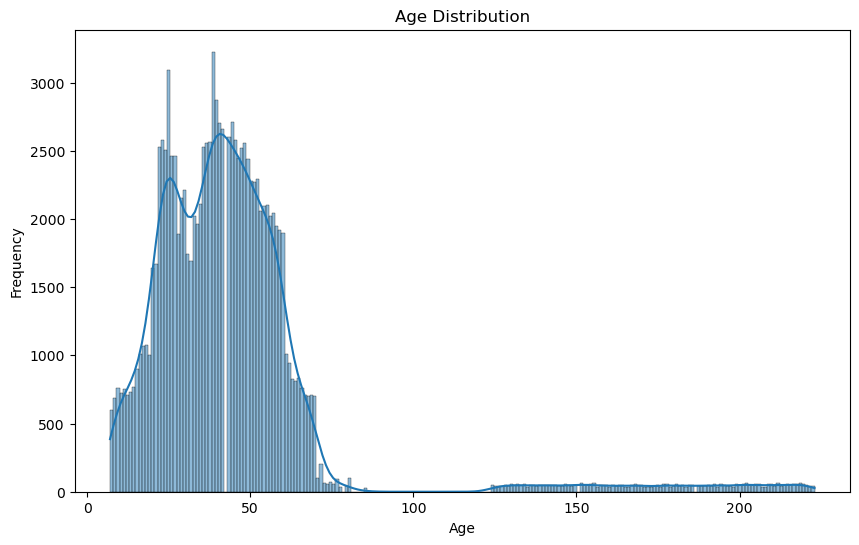

In [10]:
# Taking a look at the spread of Age of Customers

plt.figure(figsize=(10, 6))
sns.histplot(pre_df['Age'], kde=True)  # 'kde=True' adds a Kernel Density Estimation plot to the histogram.
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Perhaps some customers were uncomfortable with providing their actual birthday details, since it is generally impossible for a human to live past a natural limit of 120, according to most studies. Before we deal with the abnormal 'Age' values, we should take a look at the post trip data first as well. <br>For this category, we will remove the Age above 120 years and treat it as a non-value for now, and impute them accordingly to similar corresponding features later. 

In [11]:
# Replace the age of more than 120 with null
pre_df.loc[pre_df['Age'] > 120, 'Age'] = None # Replace the age of more than 120 with null

In [12]:
# Display the first 5 rows of the post-trip dataframe
post_df.head()

,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode,WiFi,Dining,Entertainment
0,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0
1,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0
2,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0
3,Lapras,Deluxe,280 KM,LB243DMKCFL,NaN,0,1.0
4,Lapras,Standard,1145 Miles,LB218CFLOBS,NaN,1,NaN


There is an inconsistency in the Cruise Distance column. The values are object types and are in both 'KM' and 'Miles' value.  

In [13]:
# Cleaning and converting the 'cruise distance' column to numeric values

# Extract numeric values and units from the 'cruise distance' column
post_df['distance_value'] = post_df['Cruise Distance'].str.extract('(\d+\.?\d*)').astype(float)
post_df['unit'] = post_df['Cruise Distance'].str.extract('([a-zA-Z]+)')

# Convert distances from miles to kilometers where unit is 'Miles'. 1 Mile is approximately 1.60934 KM.
mask_miles = post_df['unit'] == 'Miles'
post_df.loc[mask_miles, 'distance_value'] = post_df.loc[mask_miles, 'distance_value'] * 1.60934

# Drop the original 'cruise distance' column and the 'unit' column
post_df.drop(['Cruise Distance', 'unit'], axis=1, inplace=True)

# Rename the 'distance_value' column back to 'cruise distance' and ensure it's of type float
post_df.rename(columns={'distance_value': 'Cruise Distance'}, inplace=True)
post_df['Cruise Distance'] = post_df['Cruise Distance'].astype(float)

In [15]:
# Checking on the different cruises and ticket types
print(post_df['Cruise Name'].unique()) # Display the unique values of the 'Cruise' column
print(post_df['Ticket Type'].unique()) # Display the unique values of the 'Ticket' column
print(post_df['WiFi'].unique()) # Display the unique values of the 'WiFi' column
print(post_df['Dining'].unique()) # Display the unique values of the 'Dining' column
print(post_df['Entertainment'].unique()) # Display the unique values of the 'Entertainment' column

['Blastoise' 'IAPRAS' 'Lapras' None 'blast' 'lap' 'blastoise' 'blast0ise'
 'lapras']
[None 'Deluxe' 'Standard' 'Luxury']
[ 1. nan  0.]
[1 0]
[ 1.  0. nan]


From above, it is likely that there are only 2 cruise liners, 'Blastoise' and 'Lapras', taking into consideration typos etc. Lets clean the data. 

In [16]:
# Cleaning the 'Cruise Name' column
def clean_cruise_name(name):
    if pd.isnull(name):
        return None
    name = name.lower().strip()  # Convert to lowercase and strip whitespaces
    
    # Mapping variations of 'Blastoise'
    if 'blast' in name:
        return 'Blastoise'
    # Mapping variations of 'Lapras'
    elif 'lap' in name:
        return 'Lapras'
    elif 'pras' in name:
        return 'Lapras'
    else:
        return name

post_df['Cruise Name'] = post_df['Cruise Name'].apply(clean_cruise_name)
post_df.head()


,Cruise Name,Ticket Type,Ext_Intcode,WiFi,Dining,Entertainment,Cruise Distance
0,Blastoise,None,LB446RWOOZI,1.0,1,1.0,3567.0000
1,Blastoise,Deluxe,LB138HKBECM,NaN,0,1.0,672.0000
2,Lapras,Deluxe,BL713UHBAAN,NaN,0,0.0,1167.0000
3,Lapras,Deluxe,LB243DMKCFL,NaN,0,1.0,280.0000
4,Lapras,Standard,LB218CFLOBS,NaN,1,NaN,1842.6943


In [17]:
# After some basic cleaning, lets merge the datasets
# Merging pre_df and post_df on 'Ext_Intcode'
merged_df = pre_df.merge(post_df, on='Ext_Intcode', how='inner')
merged_df.head()

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,...,Onboard Service,Cleanliness,Ext_Intcode,Age,Cruise Name,Ticket Type,WiFi,Dining,Entertainment,Cruise Distance
0,None,1973-10-05,Direct - Company Website,2.0,3.0,5.0,3.0,2023-01-01 00:00:00,4.0,2.0,...,2.0,3.0,LB446RWOOZI,50.0,Blastoise,None,1.0,1,1.0,3567.0000
1,Female,NaT,Indirect - Social Media,1.0,4.0,1.0,NaN,2023-01-01 00:01:00,4.0,NaN,...,4.0,4.0,LB138HKBECM,NaN,Blastoise,Deluxe,NaN,0,1.0,672.0000
2,Female,1998-07-22,Indirect - Search Engine,NaN,3.0,0.0,5.0,2023-01-01 00:02:00,NaN,NaN,...,3.0,NaN,BL713UHBAAN,25.0,Lapras,Deluxe,NaN,0,0.0,1167.0000
3,Female,1970-05-01,Direct - Company Website,4.0,4.0,4.0,4.0,2023-01-01 00:05:00,3.0,4.0,...,2.0,4.0,LB243DMKCFL,53.0,Lapras,Deluxe,NaN,0,1.0,280.0000
4,Male,1960-01-07,Direct - Company Website,3.0,4.0,2.0,NaN,2023-01-01 00:06:00,1.0,2.0,...,2.0,NaN,LB218CFLOBS,63.0,Lapras,Standard,NaN,1,NaN,1842.6943


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141538 entries, 0 to 141537
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Gender                                      127308 non-null  object        
 1   Date of Birth                               126056 non-null  datetime64[ns]
 2   Source of Traffic                           141538 non-null  object        
 3   Onboard Wifi Service                        120910 non-null  float64       
 4   Embarkation/Disembarkation time convenient  125005 non-null  float64       
 5   Ease of Online booking                      122047 non-null  float64       
 6   Gate location                               123400 non-null  float64       
 7   Logging                                     141538 non-null  datetime64[ns]
 8   Onboard Dining Service                      123793 non-null  float64      

#### Missing Values - An initial look

In [19]:
# Checking for missing values in the pre-purchase dataframe
pre_df.isnull().sum()

Gender                                        13456
Date of Birth                                 14684
Source of Traffic                                 0
Onboard Wifi Service                          19492
Embarkation/Disembarkation time convenient    15643
Ease of Online booking                        18355
Gate location                                 17140
Logging                                           0
Onboard Dining Service                        16809
Online Check-in                               15687
Cabin Comfort                                 20252
Onboard Entertainment                         15913
Cabin service                                 13832
Baggage handling                              20293
Port Check-in Service                         14347
Onboard Service                               18327
Cleanliness                                   18402
Ext_Intcode                                       0
Age                                           19454
dtype: int64

<Axes: >

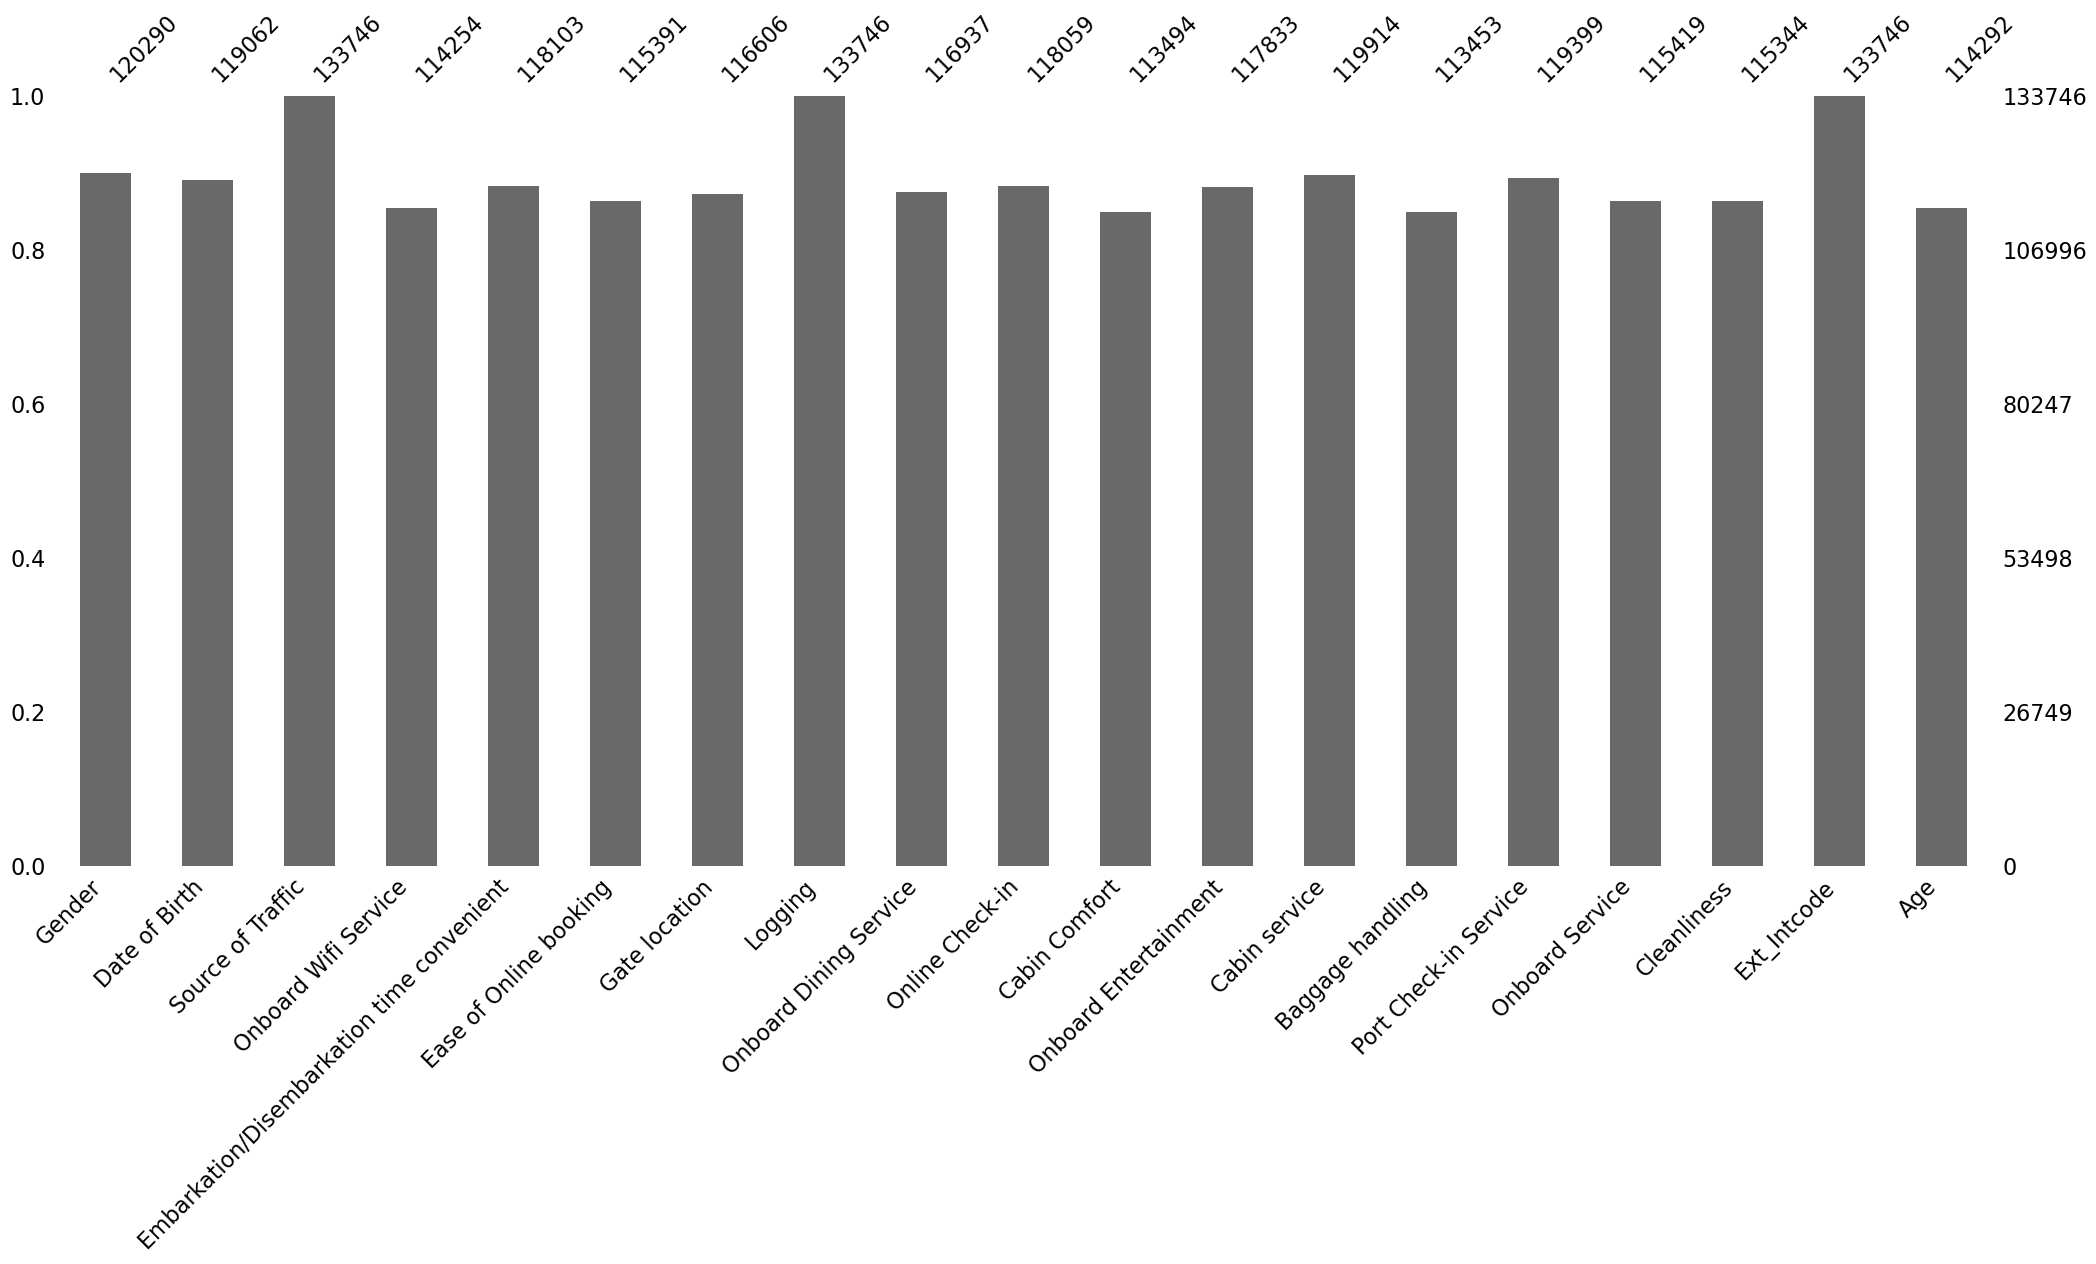

In [20]:
msno.bar(pre_df) # Visualize the missing values in the pre-purchase dataframe

In [21]:
# Checking for missing values in post-trip dataframe
post_df.isnull().sum()

Cruise Name        15931
Ticket Type        20061
Ext_Intcode            0
WiFi               69734
Dining                 0
Entertainment      60057
Cruise Distance    14486
dtype: int64

<Axes: >

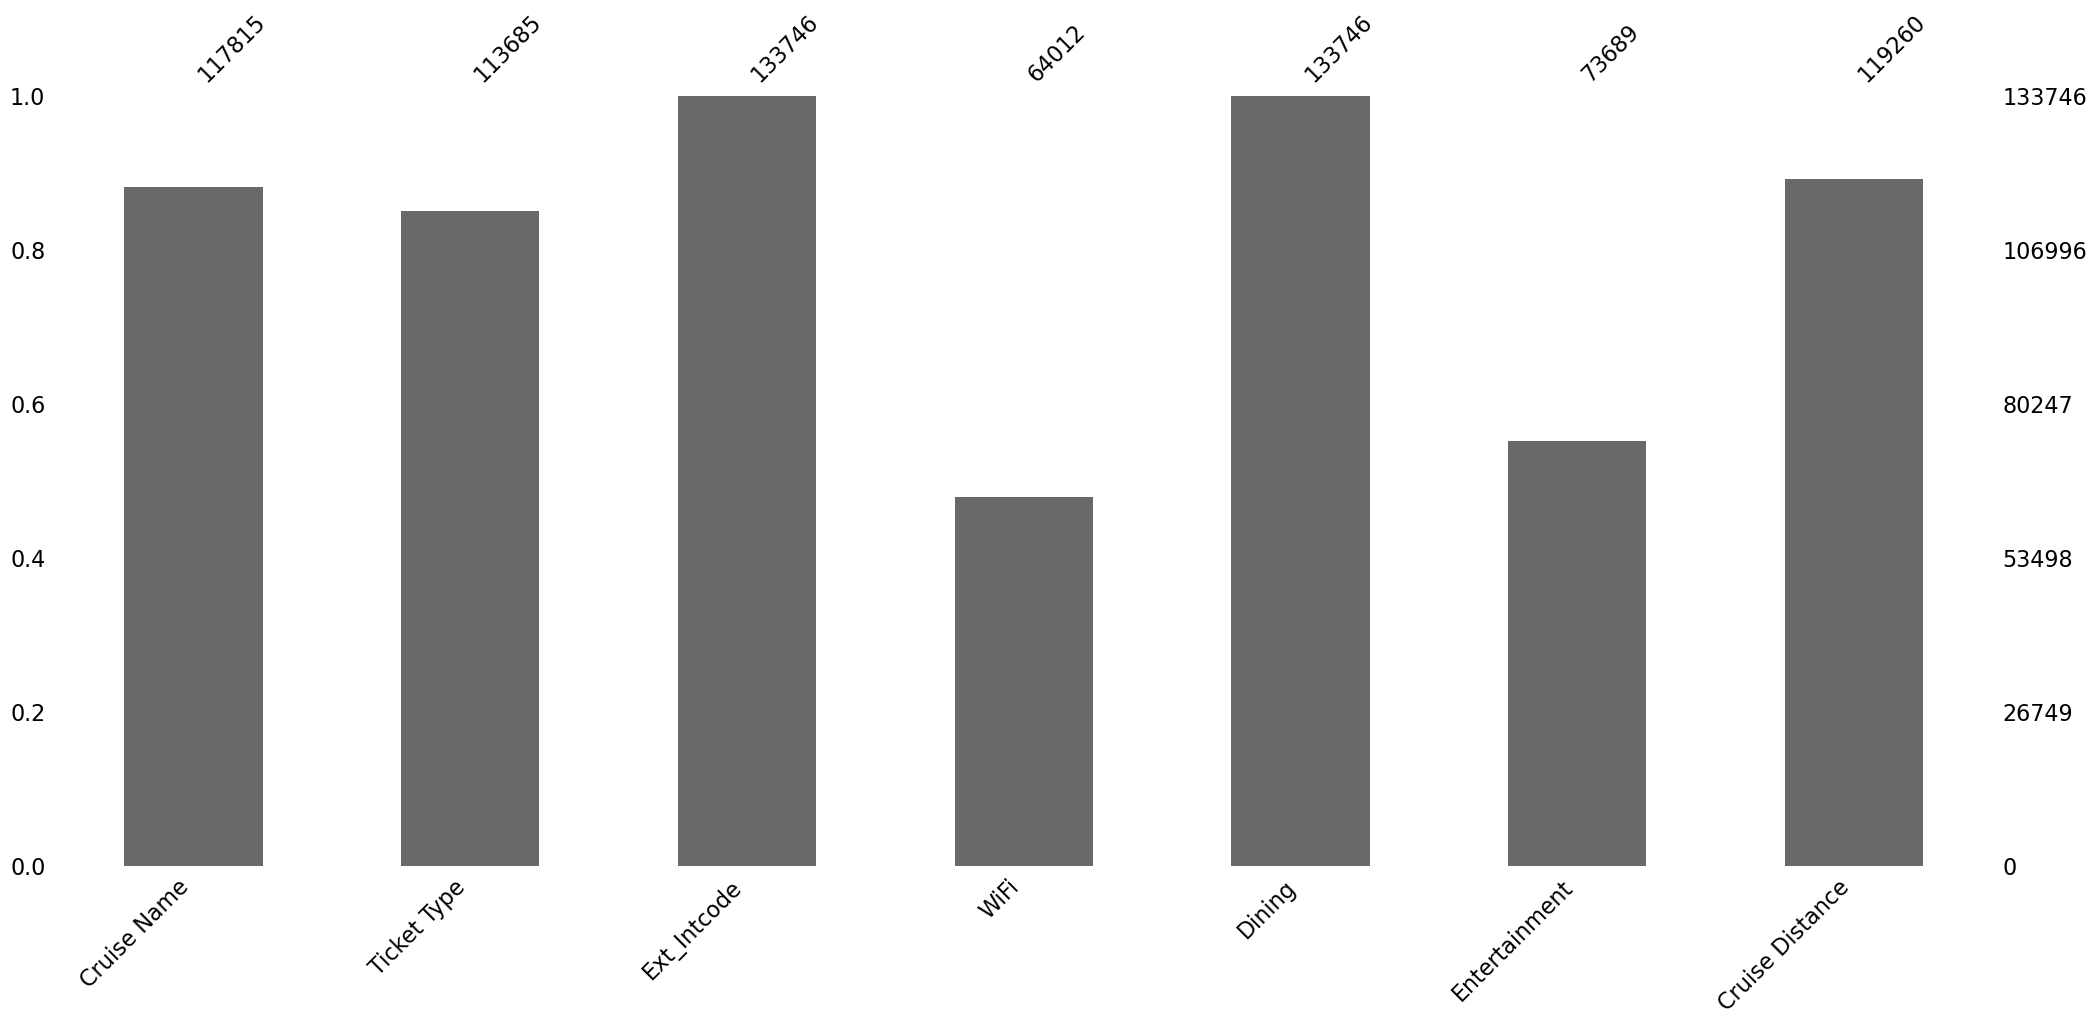

In [22]:
msno.bar(post_df) # Visualize the missing values in the pre-purchase dataframe

We will decide how to deal with the missing values after gathering more insights from our EDA. 

---

#### Overview of our numerical data

In [23]:
# Exploring distributions of numerical columns
merged_df.describe()

,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Age,WiFi,Dining,Entertainment,Cruise Distance
count,120910.000000,125005.000000,122047.000000,123400.000000,123793.000000,124909.000000,116917.000000,124693.000000,126950.000000,116869.000000,126389.000000,122059.000000,118824.000000,121006.000000,67758.000000,141538.000000,77969.000000,126234.000000
mean,2.814804,3.055886,2.759642,2.978104,3.205916,3.249790,3.440193,3.358545,3.385238,3.634360,3.311048,3.642845,3.285658,39.397146,0.500561,0.499187,0.504098,1264.051527
std,1.258693,1.525412,1.400819,1.277604,1.327344,1.351436,1.321744,1.333470,1.286991,1.178282,1.266061,1.176825,1.313191,15.122621,0.500003,0.500001,0.499986,1098.093242
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,31.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,27.000000,0.000000,0.000000,0.000000,432.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,40.000000,1.000000,0.000000,1.000000,869.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,51.000000,1.000000,1.000000,1.000000,1807.288820
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,85.000000,1.000000,1.000000,1.000000,7987.154420


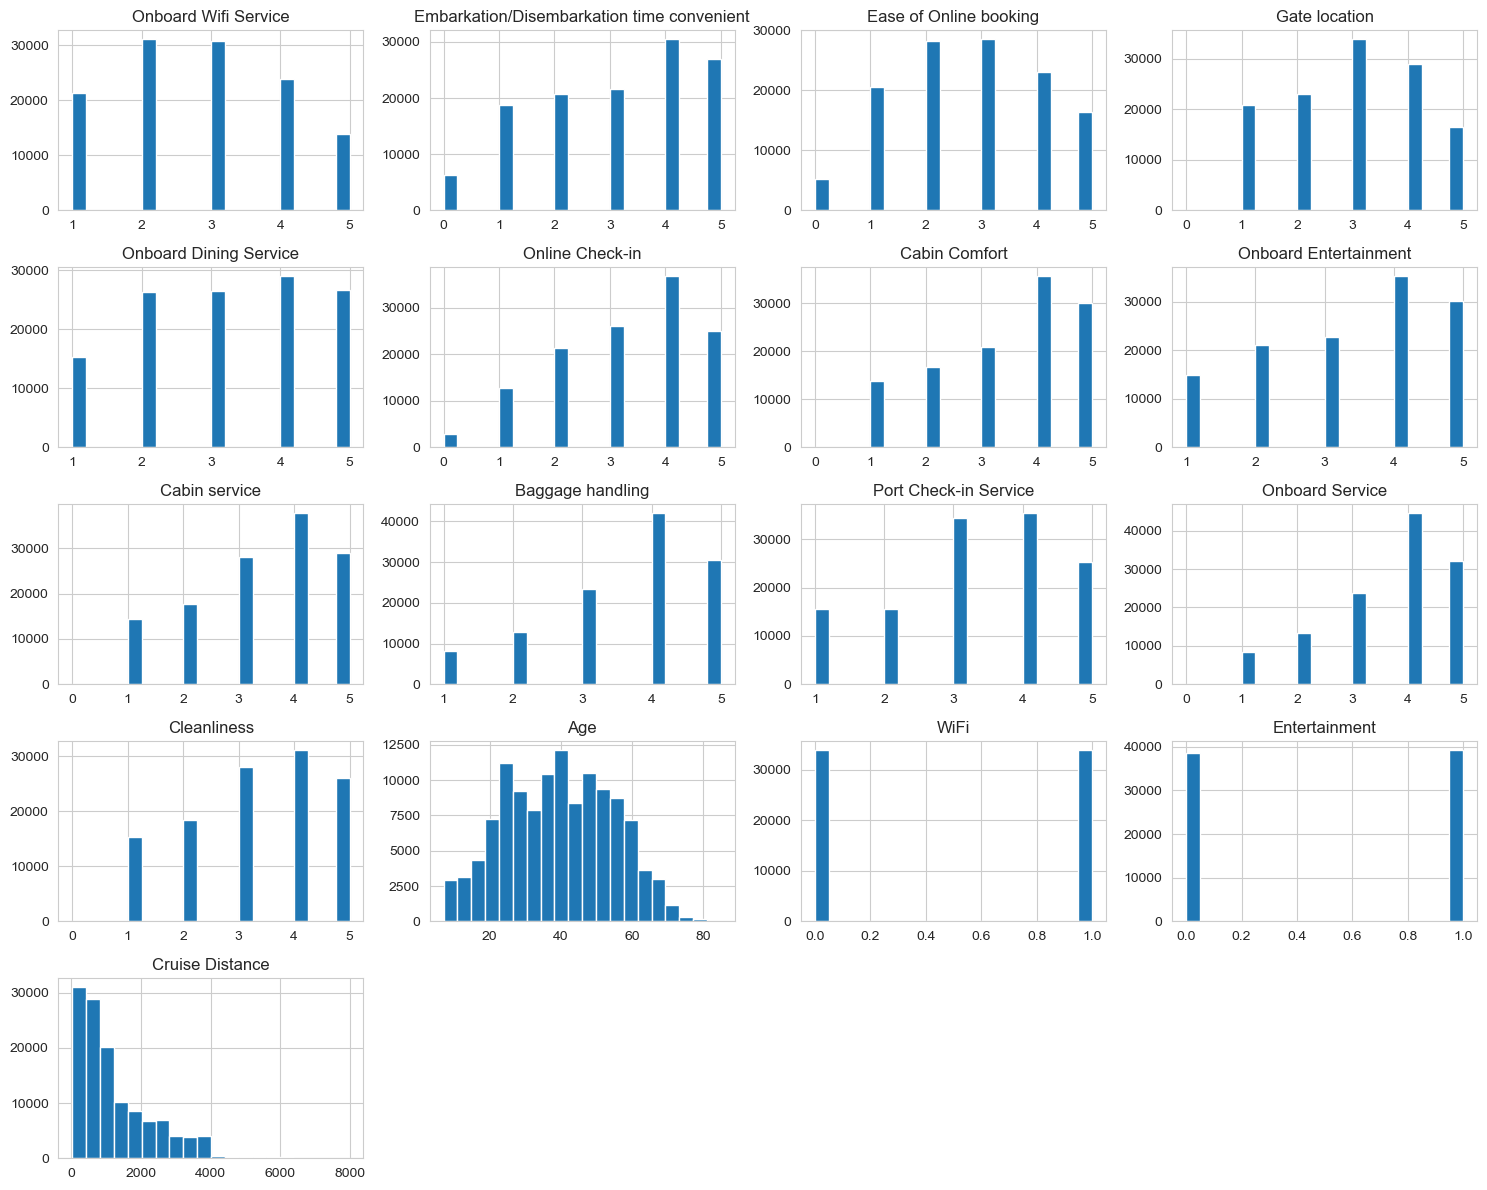

In [47]:
# Setting the style for the plots
sns.set_style('whitegrid')

# Histograms on numerical columns
numerical_columns = merged_df.select_dtypes(include=['float64']).columns
merged_df[numerical_columns].hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

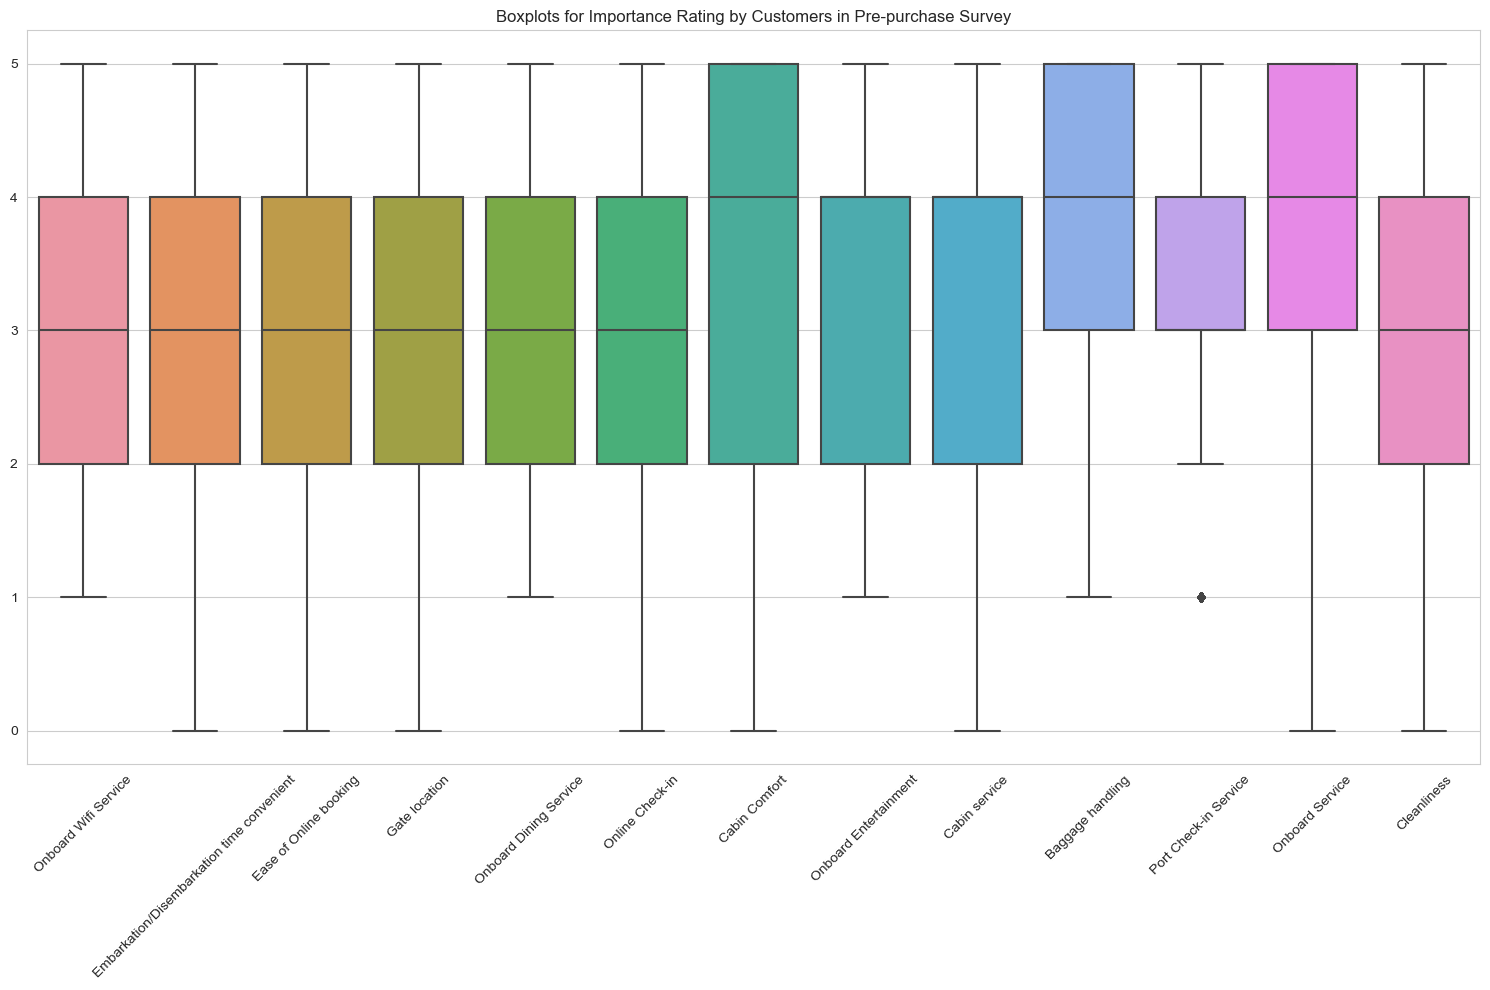

In [26]:
# List of Importance Features by customers in pre-purchase survey 
importance_features = [
    'Onboard Wifi Service',
    'Embarkation/Disembarkation time convenient',
    'Ease of Online booking',
    'Gate location',
    'Onboard Dining Service',
    'Online Check-in',
    'Cabin Comfort',
    'Onboard Entertainment',
    'Cabin service',
    'Baggage handling',
    'Port Check-in Service',
    'Onboard Service',
    'Cleanliness'
]


# Plotting boxplots for the selected numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=merged_df[importance_features])
plt.xticks(rotation=45)
plt.title('Boxplots for Importance Rating by Customers in Pre-purchase Survey')
plt.tight_layout()
plt.show()


From the above visualizations, we can see that there are more customers who prefer better cabin comfort, baggage handling and onboard service. We can perhaps also draw an assumption that customers hve a higher minimum requirement/quality expectation in terms of Baggage handling, Port Check-in Service as well as Onboard Service.     

##### Checking for Correlation and Multi-Colinearity

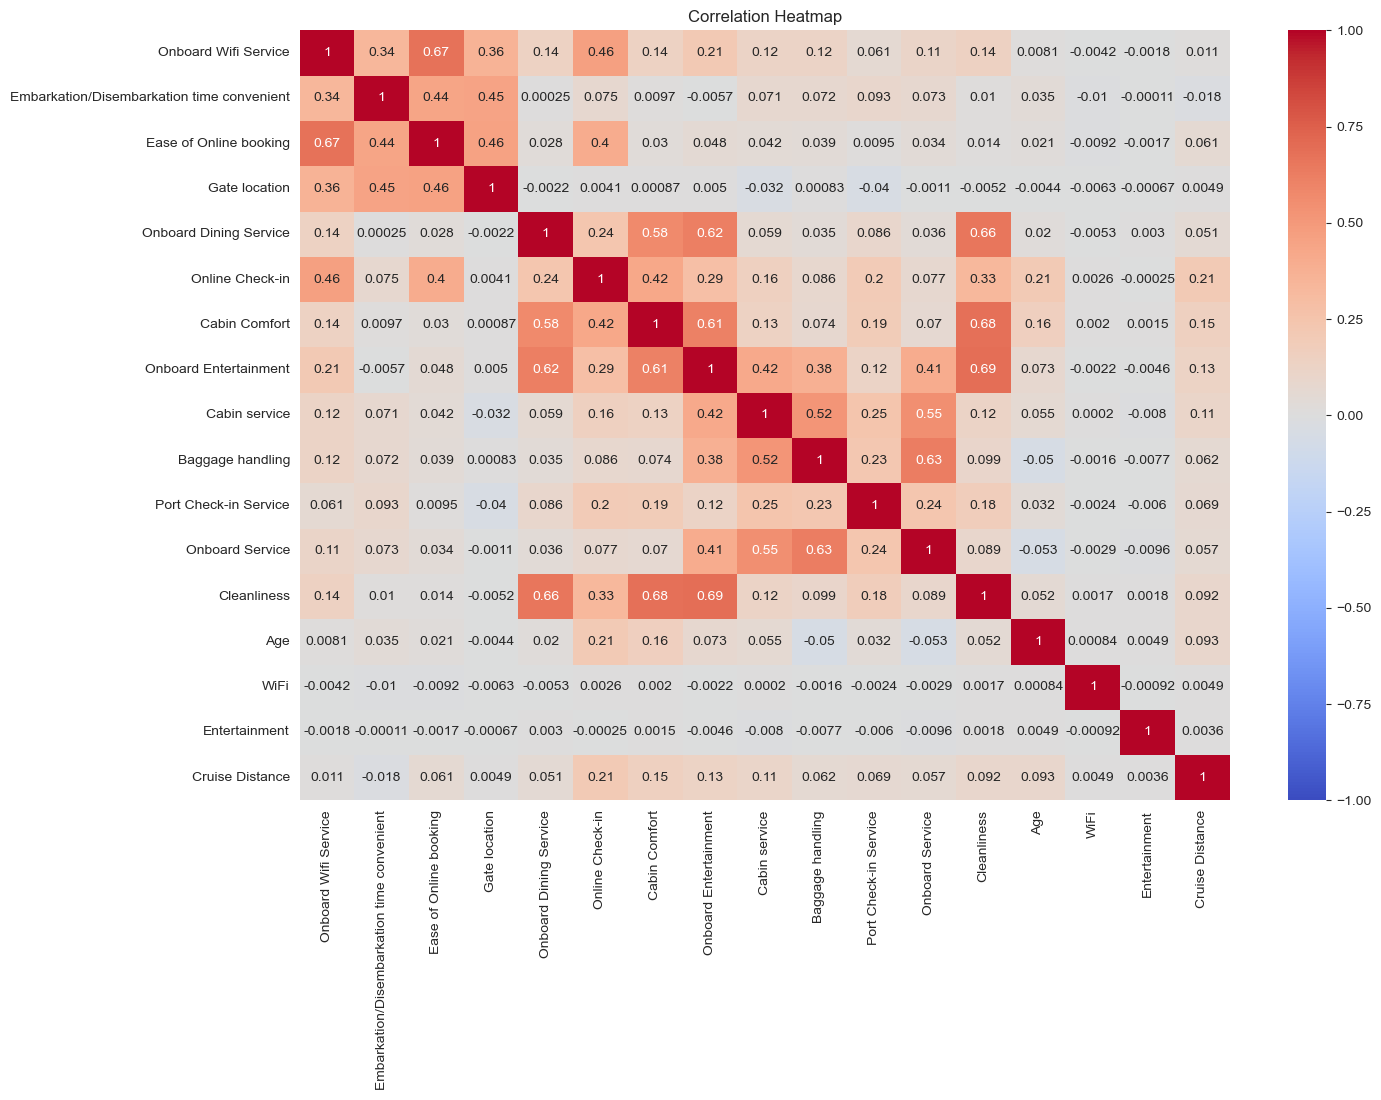

In [27]:
# Correlation Heatmap to check for multi-colinearity 
correlation_matrix = merged_df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation heatmap, we observe some to moderate correlation between features such as Cleanliness, Onboard Dining, Cabin Comfort, Onboard Entertainment, Ease of Online Booking, Cabin Service, Baggage Handling, Onboard Wifi Service etc. This might be useful for customer segmentation at a later stage. 
<br><br>
There doesn't seem to be a multi-colinearity issue between the features. 

#### Taking a look at our categorical data

In [25]:
# Information on categorical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f'\nColumn: {col}')
    print(merged_df[col].value_counts())


Column: Gender
Female    64500
Male      62808
Name: Gender, dtype: int64

Column: Source of Traffic
Direct - Email Marketing    57885
Direct - Company Website    57675
Indirect - Search Engine    13026
Indirect - Social Media     12952
Name: Source of Traffic, dtype: int64

Column: Ext_Intcode
BL263QSVDHI    4
BL650FUVEIX    4
BL577PBKEXZ    4
LB565VNODOI    4
LB716KHAIGV    4
              ..
LB166NYGYZY    1
BL581NOSKJC    1
LB284SCDTQC    1
BL818BICDTR    1
LB539JAJHXJ    1
Name: Ext_Intcode, Length: 129850, dtype: int64

Column: Cruise Name
Blastoise    82578
Lapras       42059
Name: Cruise Name, dtype: int64

Column: Ticket Type
Luxury      57570
Standard    53999
Deluxe       8713
Name: Ticket Type, dtype: int64


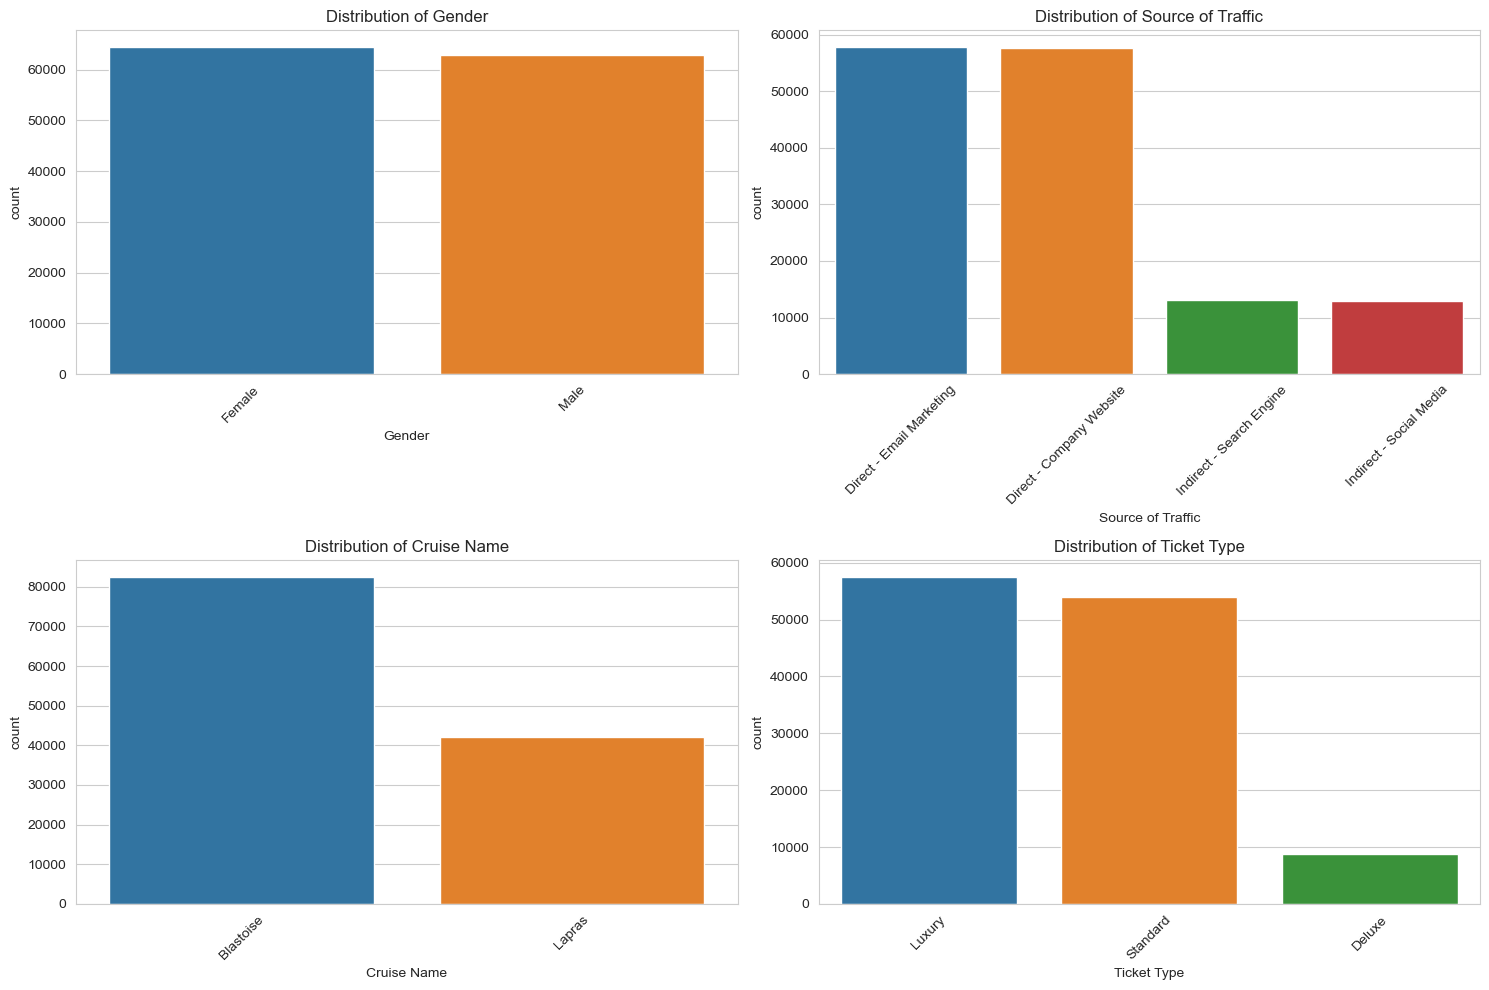

In [28]:
# List of categorical columns excluding 'Ext_Intcode'
categorical_columns_excluded = [col for col in categorical_columns if col != 'Ext_Intcode']

# Plotting bar plots for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns_excluded, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=merged_df, x=col, order=merged_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Based on the above plots;
- The guests are balanced in both gender types.
- Most sales come from Direct Sources of Traffic.
- Blastoise Cruise has more tickets sold, although that could just mean that Blastoise may be a bigger cruiseliner than Lapras.
- There is only a small ratio of Deluxe tickets sold.

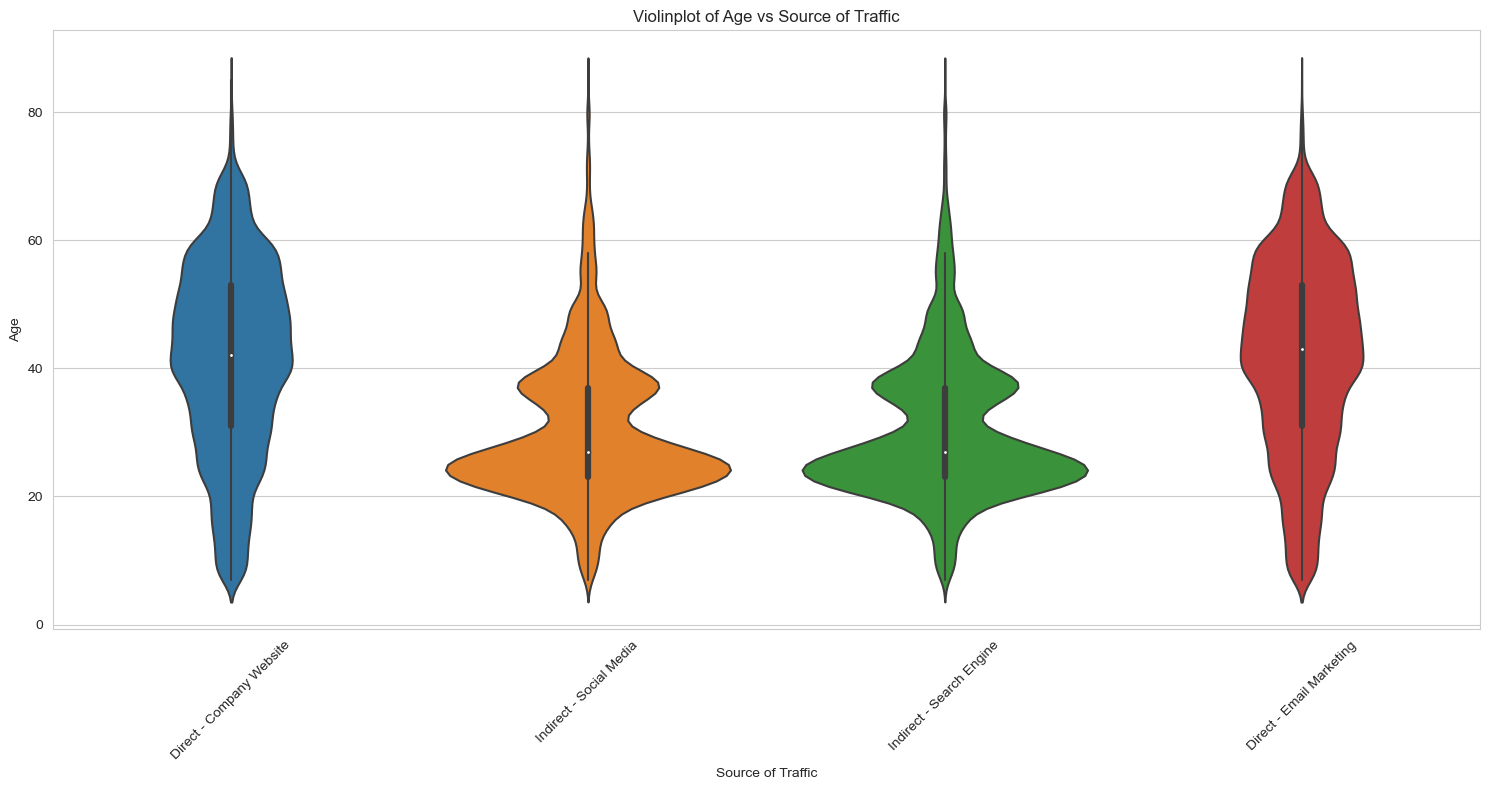

In [29]:
# Violinplot of 'Age' vs 'Source of Traffic'
plt.figure(figsize=(15, 8))
sns.violinplot(data=merged_df, x='Source of Traffic', y='Age')
plt.title('Violinplot of Age vs Source of Traffic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the violinplot above it seems that higher age groups purchase their tickets via Direct Sources while the younger crowd is drawn in from Indirect Sources. We could use this to assess the marketing campaign strategies and success.  

It might be useful to segment the customers according to different age groups, as their buying behaviour, preferences and demands would differ. 
<br>We will group them by the stages of their lives;
<br><18 : Teen
<br>18-30 : Young Working Adult
<br>31-45 : Adult/Young Parenthood
<br>46-60 : Established Family
<br>61-80 : Retiree 
<br>80+ : Old Elderly

In [30]:
# Categorize age into groups
bins = [0, 18, 30, 45, 60, 80, 100]
labels = ['<18', '18-30', '31-45', '46-60', '61-80', '80+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the dataframe with the new 'Age Group' column
merged_df[['Age', 'Age Group']].head()

,Age,Age Group
0,50.0,46-60
1,NaN,NaN
2,25.0,18-30
3,53.0,46-60
4,63.0,61-80


#### Exploring our data as a whole

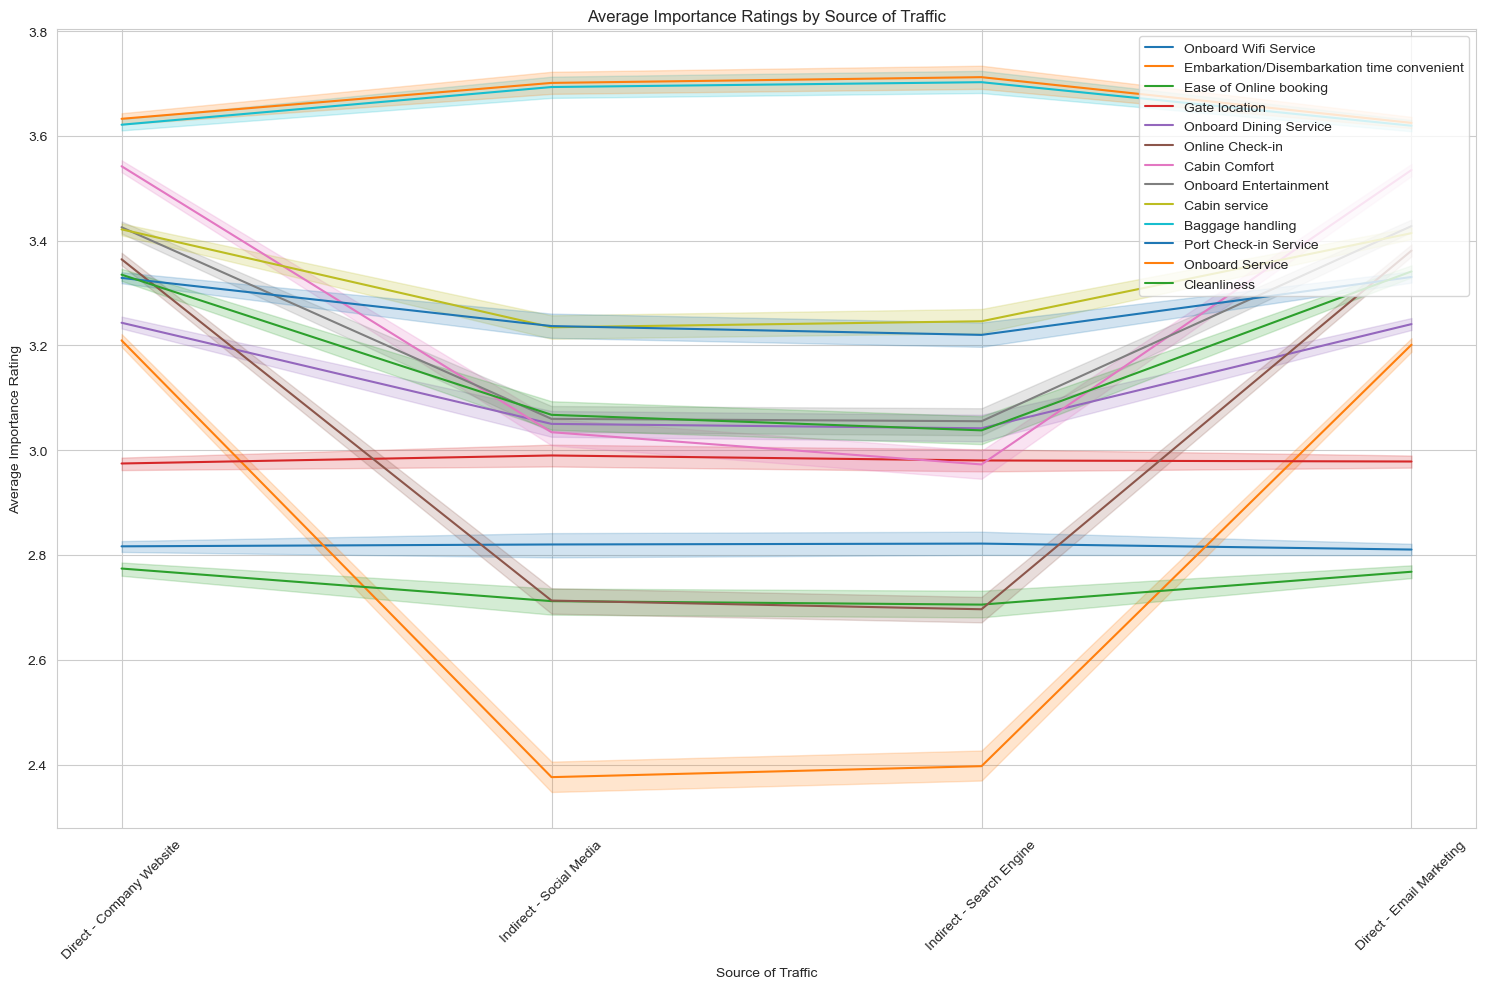

In [31]:
plt.figure(figsize=(15, 10))
for feature in importance_features:
    sns.lineplot(data=merged_df, x='Source of Traffic', y=feature, label=feature)

plt.title('Average Importance Ratings by Source of Traffic')
plt.ylabel('Average Importance Rating')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

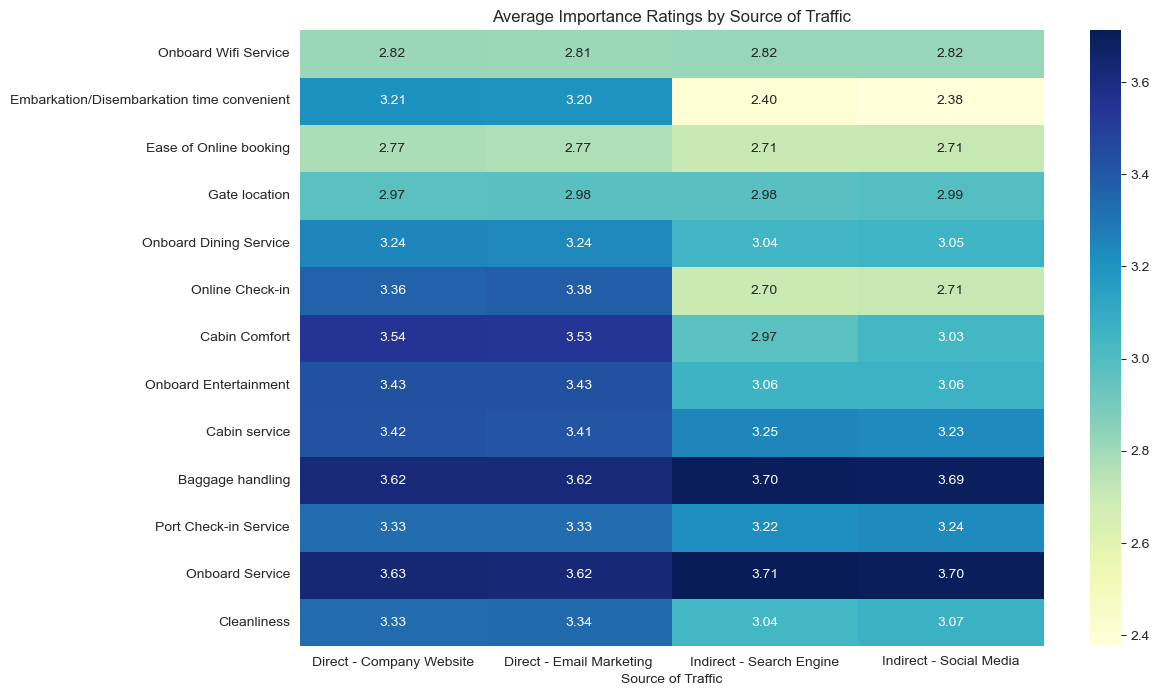

In [32]:
# Heatmap for average importance ratings by source of traffic
heatmap_data = merged_df.groupby('Source of Traffic')[importance_features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Importance Ratings by Source of Traffic')
plt.show()

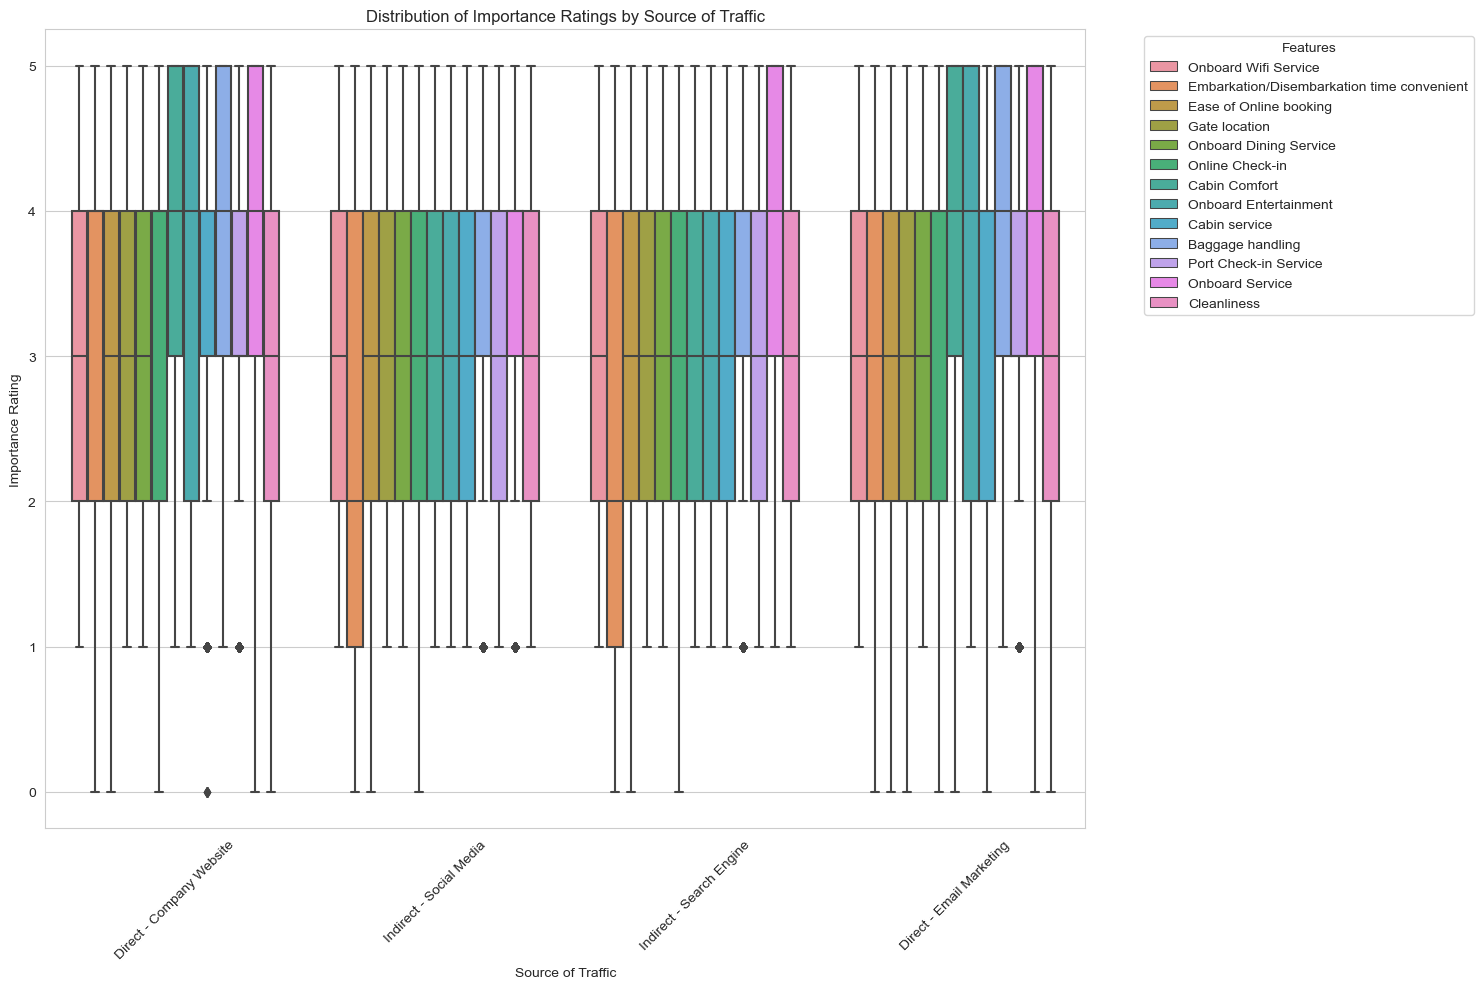

In [33]:
# Boxplot for importance ratings by source of traffic
plt.figure(figsize=(15, 10))
melted_data = merged_df.melt(id_vars='Source of Traffic', value_vars=importance_features)
sns.boxplot(data=melted_data, x='Source of Traffic', y='value', hue='variable')
plt.title('Distribution of Importance Ratings by Source of Traffic')
plt.ylabel('Importance Rating')
plt.xlabel('Source of Traffic')
plt.xticks(rotation=45)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The following observations are made from the above;
- For Indirect Sources of Traffic as compared to Direct Sources of Traffic; 
    - There is a significant lower average importance rating for Embarkation/Disembarkation time convenient, Online Check-in, Cabin Comfort 
    - There is a slightly higher average importance rating for Onboard Service, Baggage Handling, although they are both highly regards in across all groups.
    
    
- Gate Location, Onboard Wifi Service and Cleanliness are similar in importance between the different groups

From here we can see that onboard comfort, services and amenities type expectations differ amongst the groups. 


From the boxplot we gather that for direct sources there is a higher emphasis on Cabin Comfort, Onboard Entertainment,Baggage Handling and Onboard Service whereas customers from Indirect traffic sources are generally less demanding in those areas.  

Lets delve deeper into the different sources of traffic and explore whether the age group differs in each source. 

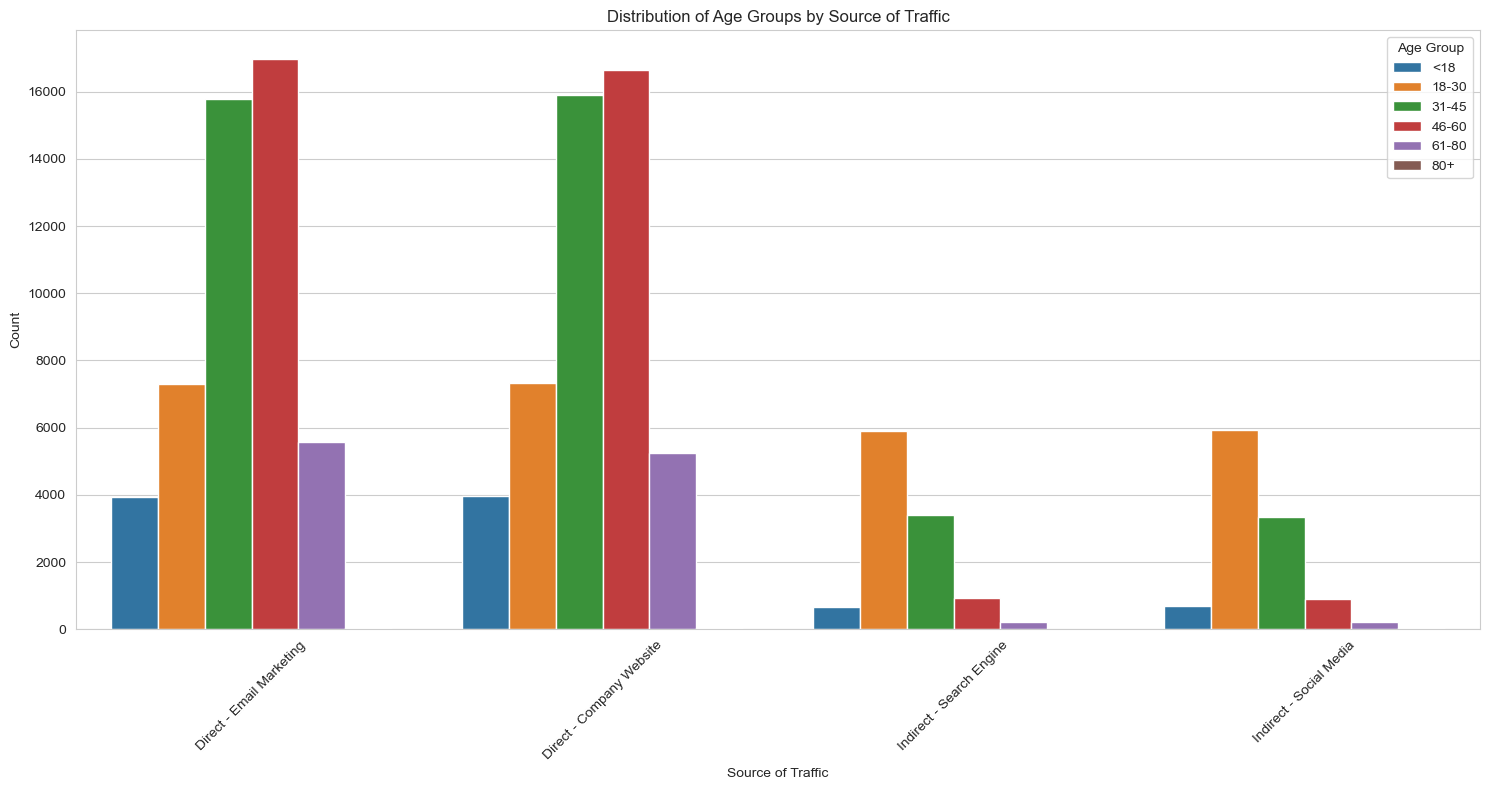

In [34]:
# Bar plot for distribution of age groups by source of traffic
plt.figure(figsize=(15, 8))
sns.countplot(data=merged_df, x='Source of Traffic', hue='Age Group', order=merged_df['Source of Traffic'].value_counts().index)
plt.title('Distribution of Age Groups by Source of Traffic')
plt.ylabel('Count')
plt.xlabel('Source of Traffic')
plt.xticks(rotation=45)
plt.legend(title='Age Group', loc='upper right')
plt.tight_layout()
plt.show()

From the plot, we can observe the following:

- Most customers come from the 31-45 and 46-60 age groups, with 18-30 being the 3rd biggest segment. 
- The majority of potential customers from Indirect sources like "Search Engine", "Social Media" belong to the 18-30 age group.
- The 18-30 age group also has quite an even spread presence across the traffic sources, while other age groups have a significant increase in Direct Sources of Traffic.
- Other age groups, such as 46-60 and 61-80, have a prominent presence in Direct sources.

This analysis provides insights into the age demographics of potential customers from different traffic sources, which can be valuable for targeted marketing.

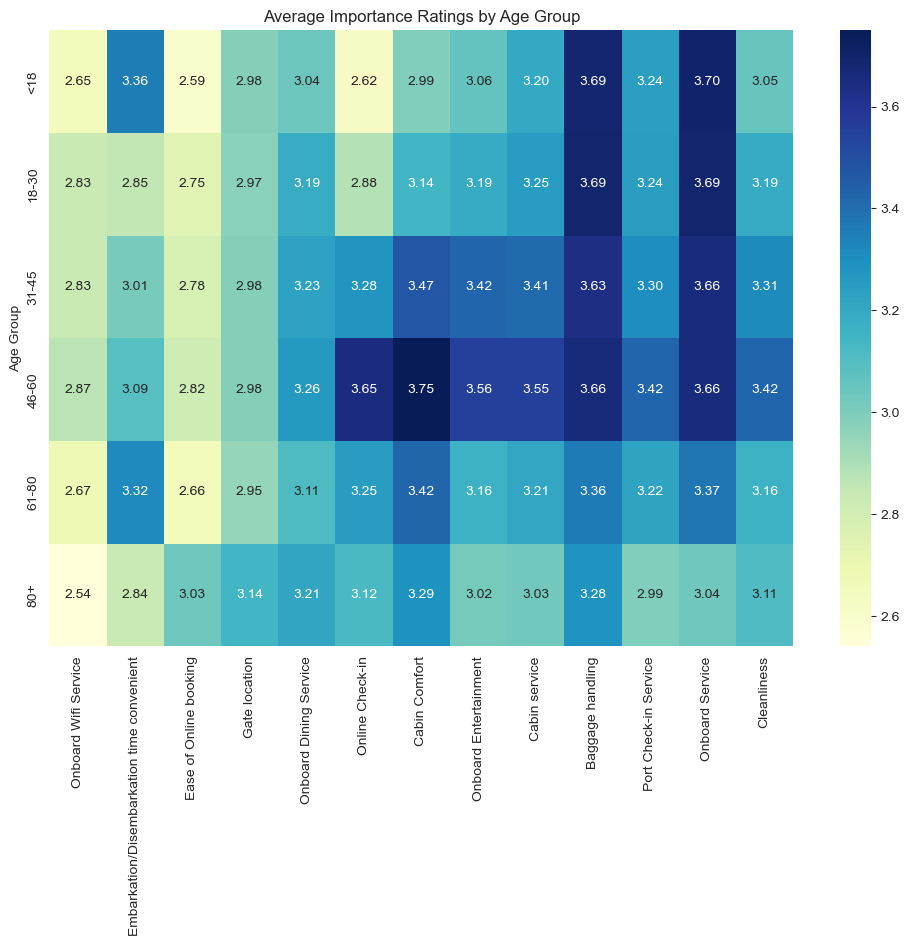

In [35]:
# Heatmap for average importance ratings by age group
heatmap_data_age = merged_df.groupby('Age Group')[importance_features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_age, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Importance Ratings by Age Group')
plt.show()

From the heatmap, we can observe:

- Features like "Onboard Wifi Service", "Baggage Handling", "Cabin Comfort", "Onboard Dining Service" and "Cleanliness" tend to have higher average importance ratings across all age groups.
- The 80+ age group seems to rate "Onboard Wifi Service" slightly lower than other age groups.
- Embarkation/Disembarkation time convenient is rated higher in <18 and 61-80 age groups. 
- The 40-60 age group generally gives higher importance to more features compared to other age groups.
<br><br>This analysis provides insights into the preferences of potential customers from different age groups, which can be valuable for targeted service improvements and marketing strategies.

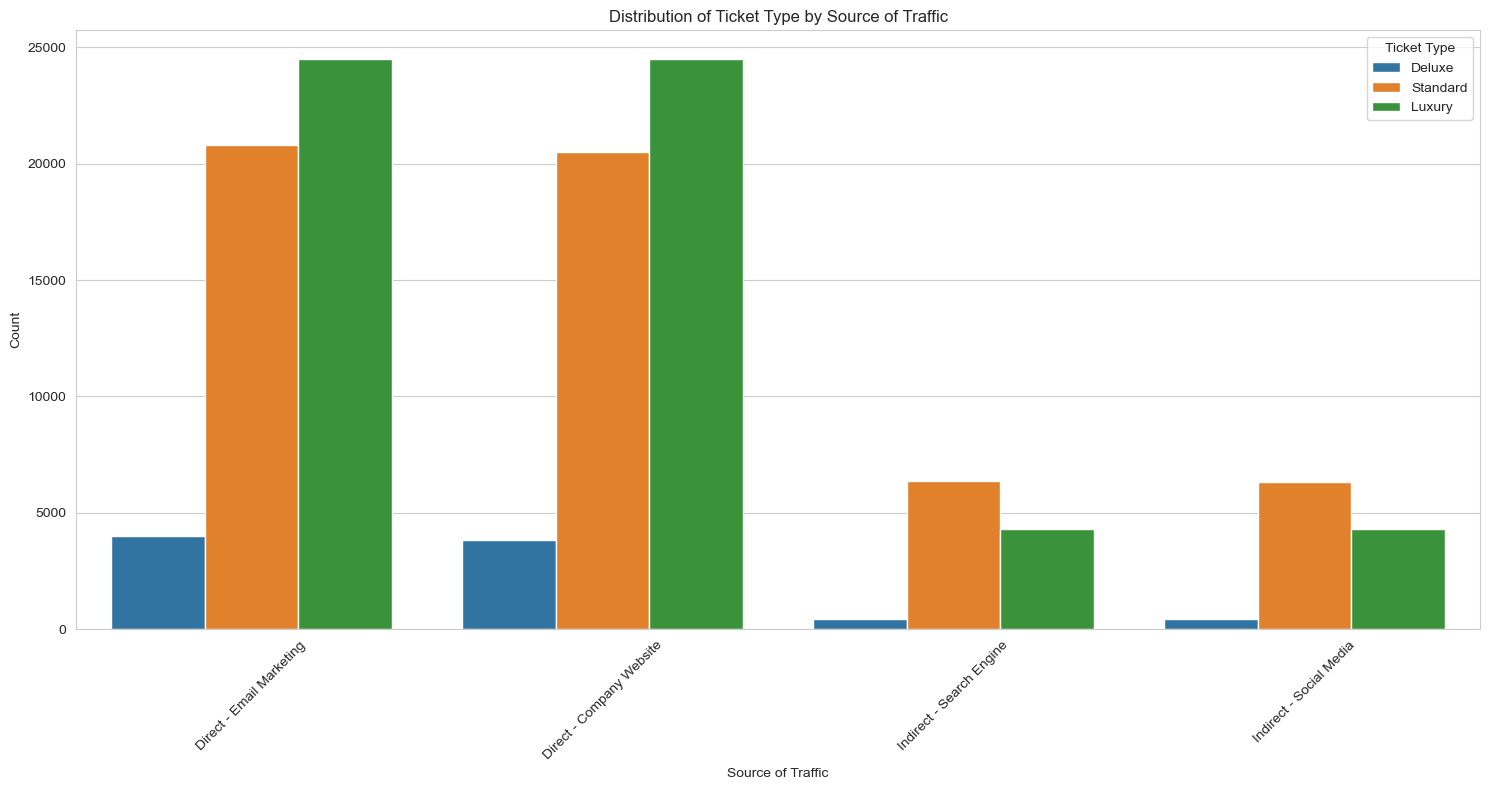

In [36]:
# Distribution of ticket type in comparison with Source of Traffic
plt.figure(figsize=(15, 8))
sns.countplot(data=merged_df, x='Source of Traffic', hue='Ticket Type', order=merged_df['Source of Traffic'].value_counts().index)
plt.title('Distribution of Ticket Type by Source of Traffic')
plt.ylabel('Count')
plt.xlabel('Source of Traffic')
plt.xticks(rotation=45)
plt.legend(title='Ticket Type', loc='upper right')
plt.tight_layout()
plt.show()

These are observations made from above: 
- Most customers from Indirect Sources of Traffic do not purchase Deluxe Tickets. 
- More Standard Tickets than Luxury Tickets are sold via Indirect Sources.
- More Luxury Tickets than Standard are sold via Direct Sources. 
<br><br>
This may suggest the following;
1. Customers who purchase tickets directly may have the tendency to buy luxury tickets
2. Customers who wants to buy luxury tickets may prefer to purchase directly. 


Lets explore if different age groups buy different types of tickets.

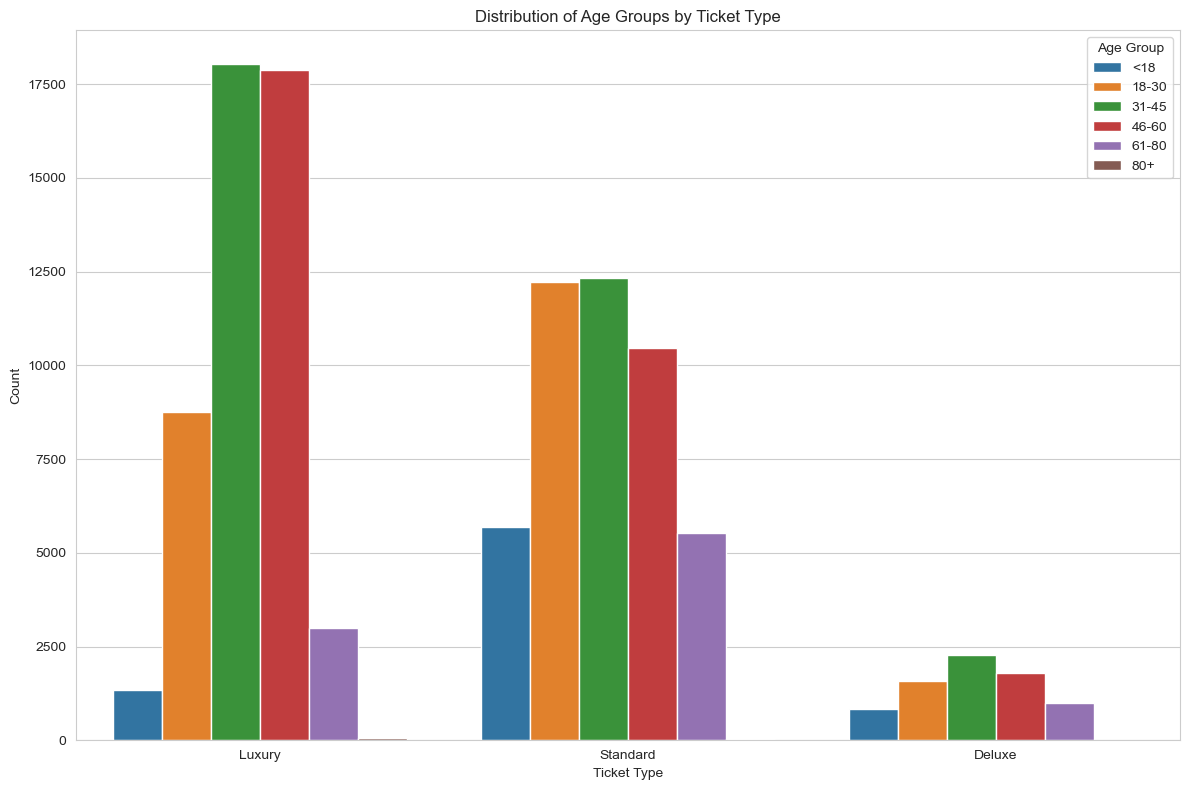

In [37]:
# Distribution of age groups by ticket type
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='Ticket Type', hue='Age Group', order=merged_df['Ticket Type'].value_counts().index)
plt.title('Distribution of Age Groups by Ticket Type')
plt.ylabel('Count')
plt.xlabel('Ticket Type')
plt.legend(title='Age Group', loc='upper right')
plt.tight_layout()
plt.show()

Observations: 
- The 31-45 age group predominantly purchases all types of tickets.
- Luxury tickets are mostly bought by 31-45 and 46-60 age groups. 
- Most <18 and >60 age group purchase the standard tickets. 
- Number of Deluxe tickets are significantly lower. 

<br><br>
This could suggest that for Luxury Ticket Type services and amenities we might want to target towards age groups of 31-45 and 46-60. 

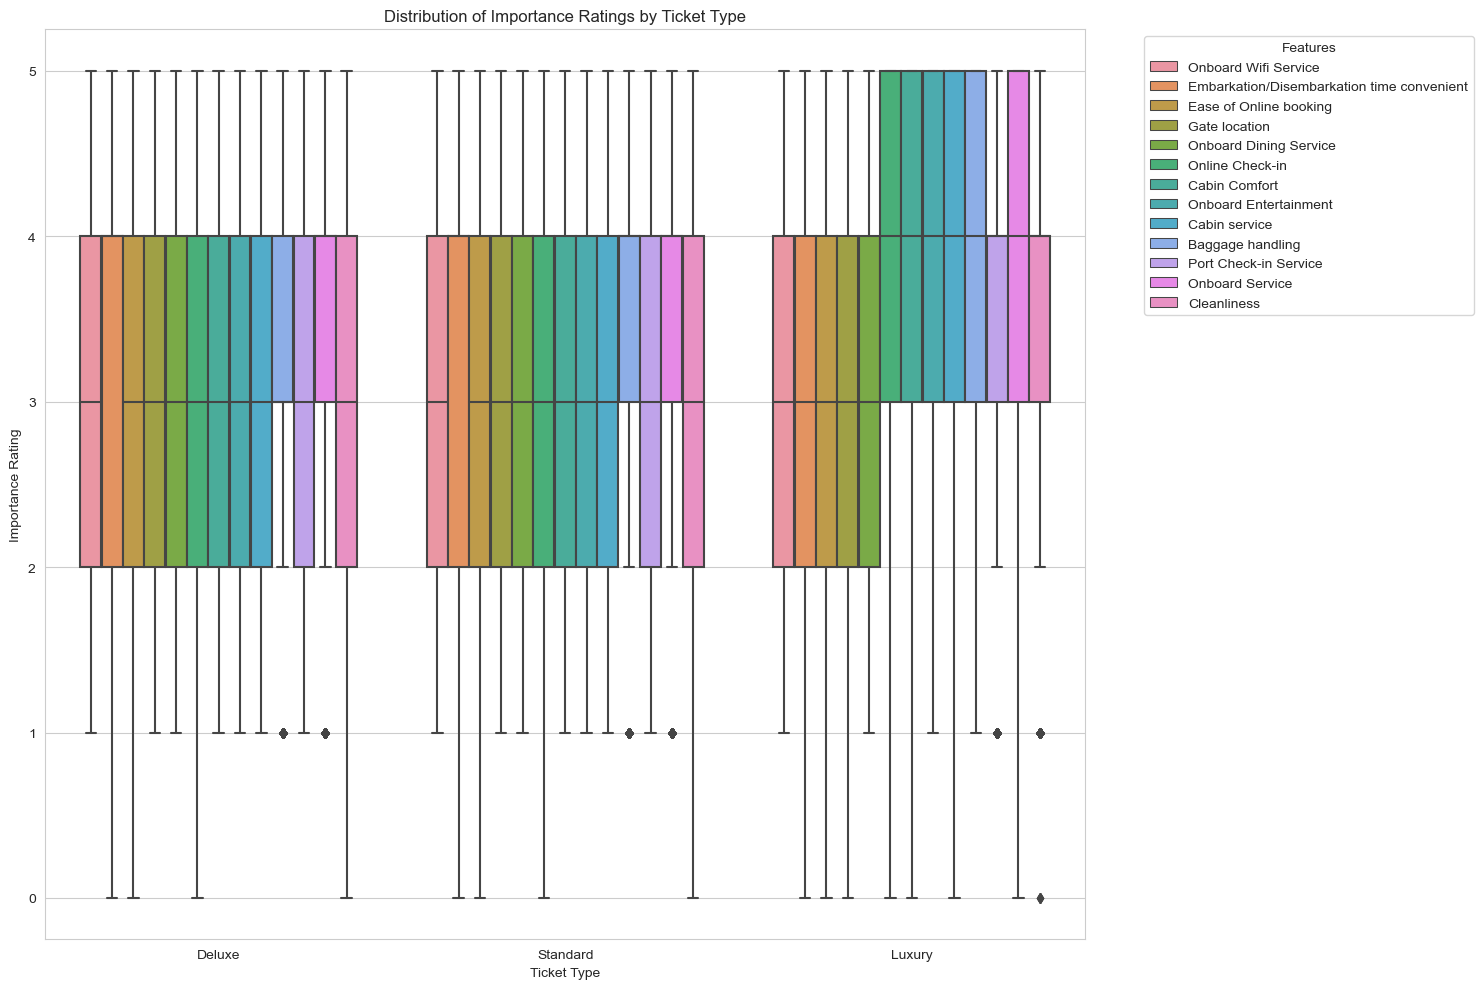

In [38]:
# Boxplot of importance ratings by ticket type
melted_data_ticket = merged_df.melt(id_vars='Ticket Type', value_vars=importance_features)
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_data_ticket, x='Ticket Type', y='value', hue='variable')
plt.title('Distribution of Importance Ratings by Ticket Type')
plt.ylabel('Importance Rating')
plt.xlabel('Ticket Type')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the boxplot, we can observe that in line with the tickets; 
- Customers who bought luxury tickets have higher expectations on the various features such as Online Check-in, Cabin Comfort, Onboard Entertainment, Cabin Service, Baggage Handling and Onboard Service. 
- The minimum requirement/expectation for Online Check-in, Cabin Comfort, Onboard Entertainment, Port Check-in Service and Cleanliness is higher in Luxury Tickets holders.

Lets explore the satisfactory levels of ticket holders. 

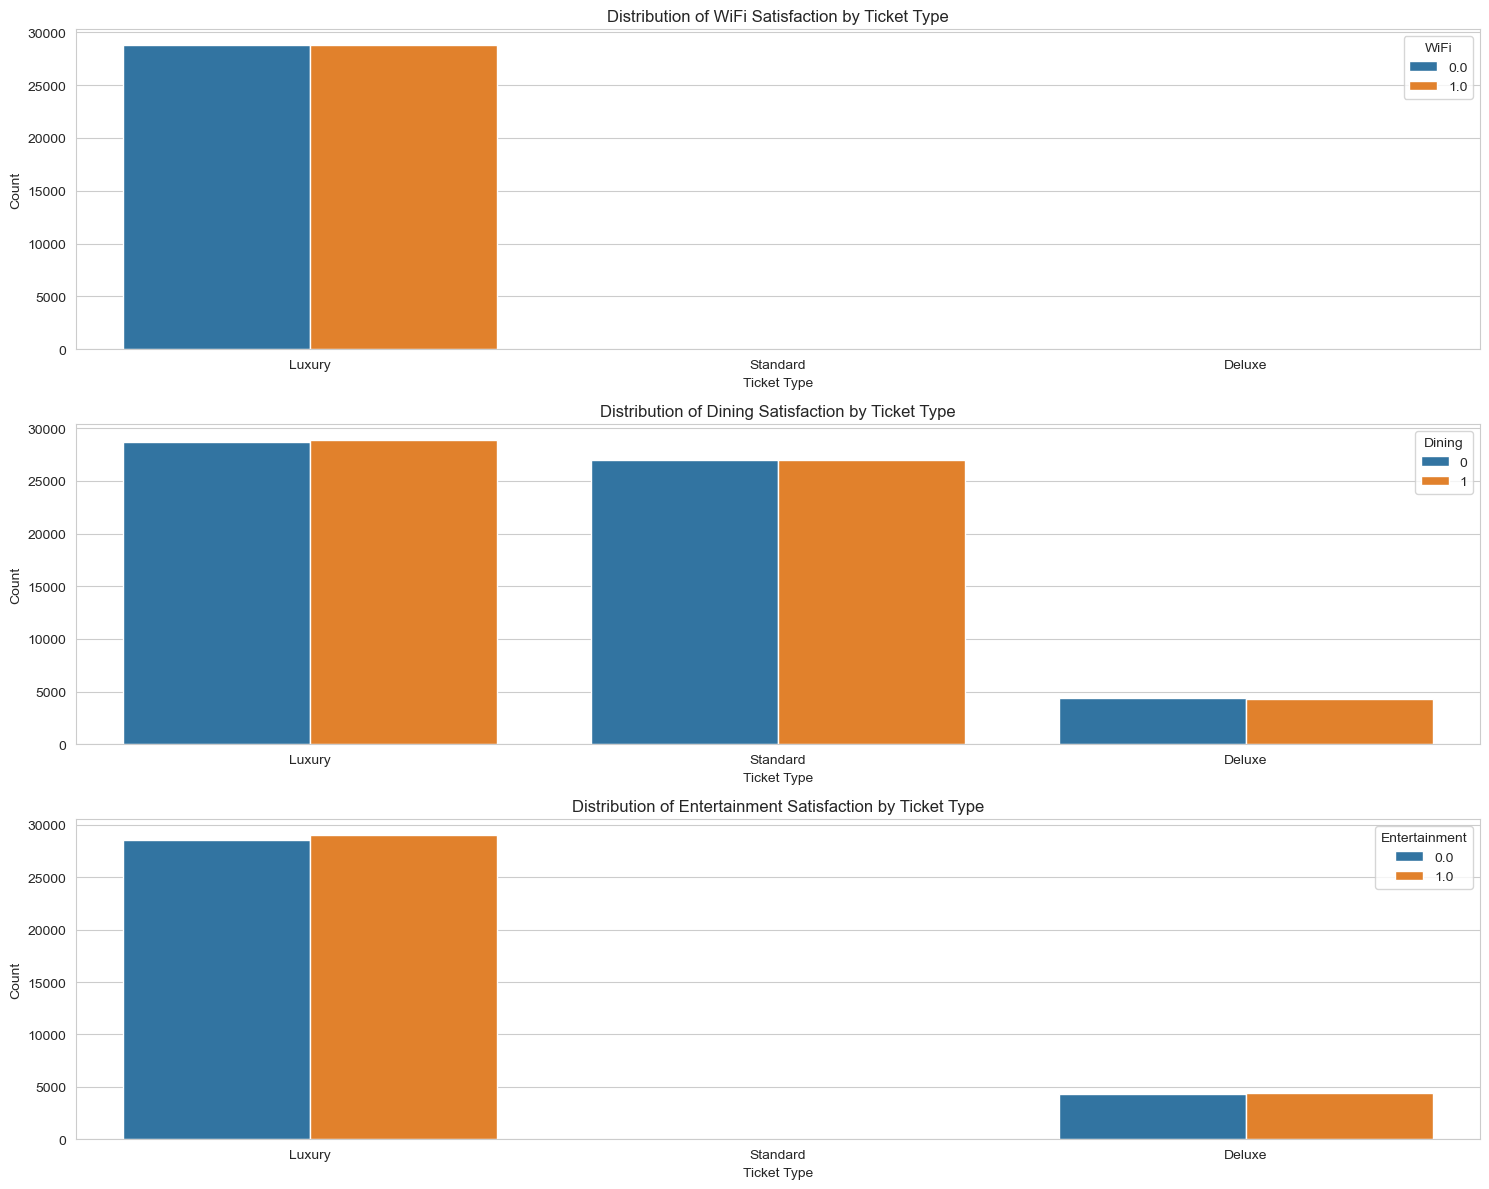

In [39]:
# Count plots for 'WiFi', 'Dining', and 'Entertainment' against 'Ticket Type'
services = ['WiFi', 'Dining', 'Entertainment']

plt.figure(figsize=(15, 12))
for i, service in enumerate(services, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=merged_df, x='Ticket Type', hue=service, order=merged_df['Ticket Type'].value_counts().index)
    plt.title(f'Distribution of {service} Satisfaction by Ticket Type')
    plt.ylabel('Count')
    plt.xlabel('Ticket Type')
    plt.legend(title=service, loc='upper right')
    plt.tight_layout()
plt.show()

In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141538 entries, 0 to 141537
Data columns (total 26 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Gender                                      127308 non-null  object        
 1   Date of Birth                               126056 non-null  datetime64[ns]
 2   Source of Traffic                           141538 non-null  object        
 3   Onboard Wifi Service                        120910 non-null  float64       
 4   Embarkation/Disembarkation time convenient  125005 non-null  float64       
 5   Ease of Online booking                      122047 non-null  float64       
 6   Gate location                               123400 non-null  float64       
 7   Logging                                     141538 non-null  datetime64[ns]
 8   Onboard Dining Service                      123793 non-null  float64      

We can conclude that the different ticket types include the following services/amenities;
1. Luxury Tickets - <b>WiFi, Dining & Entertainment</b>
2. Deluxe - <b>Dining & Entertainment</b>
3. Standard - <b>Dining only</b>

<br><br>
Satisfaction levels (0 or 1) in post trip survey are generally balanced.  

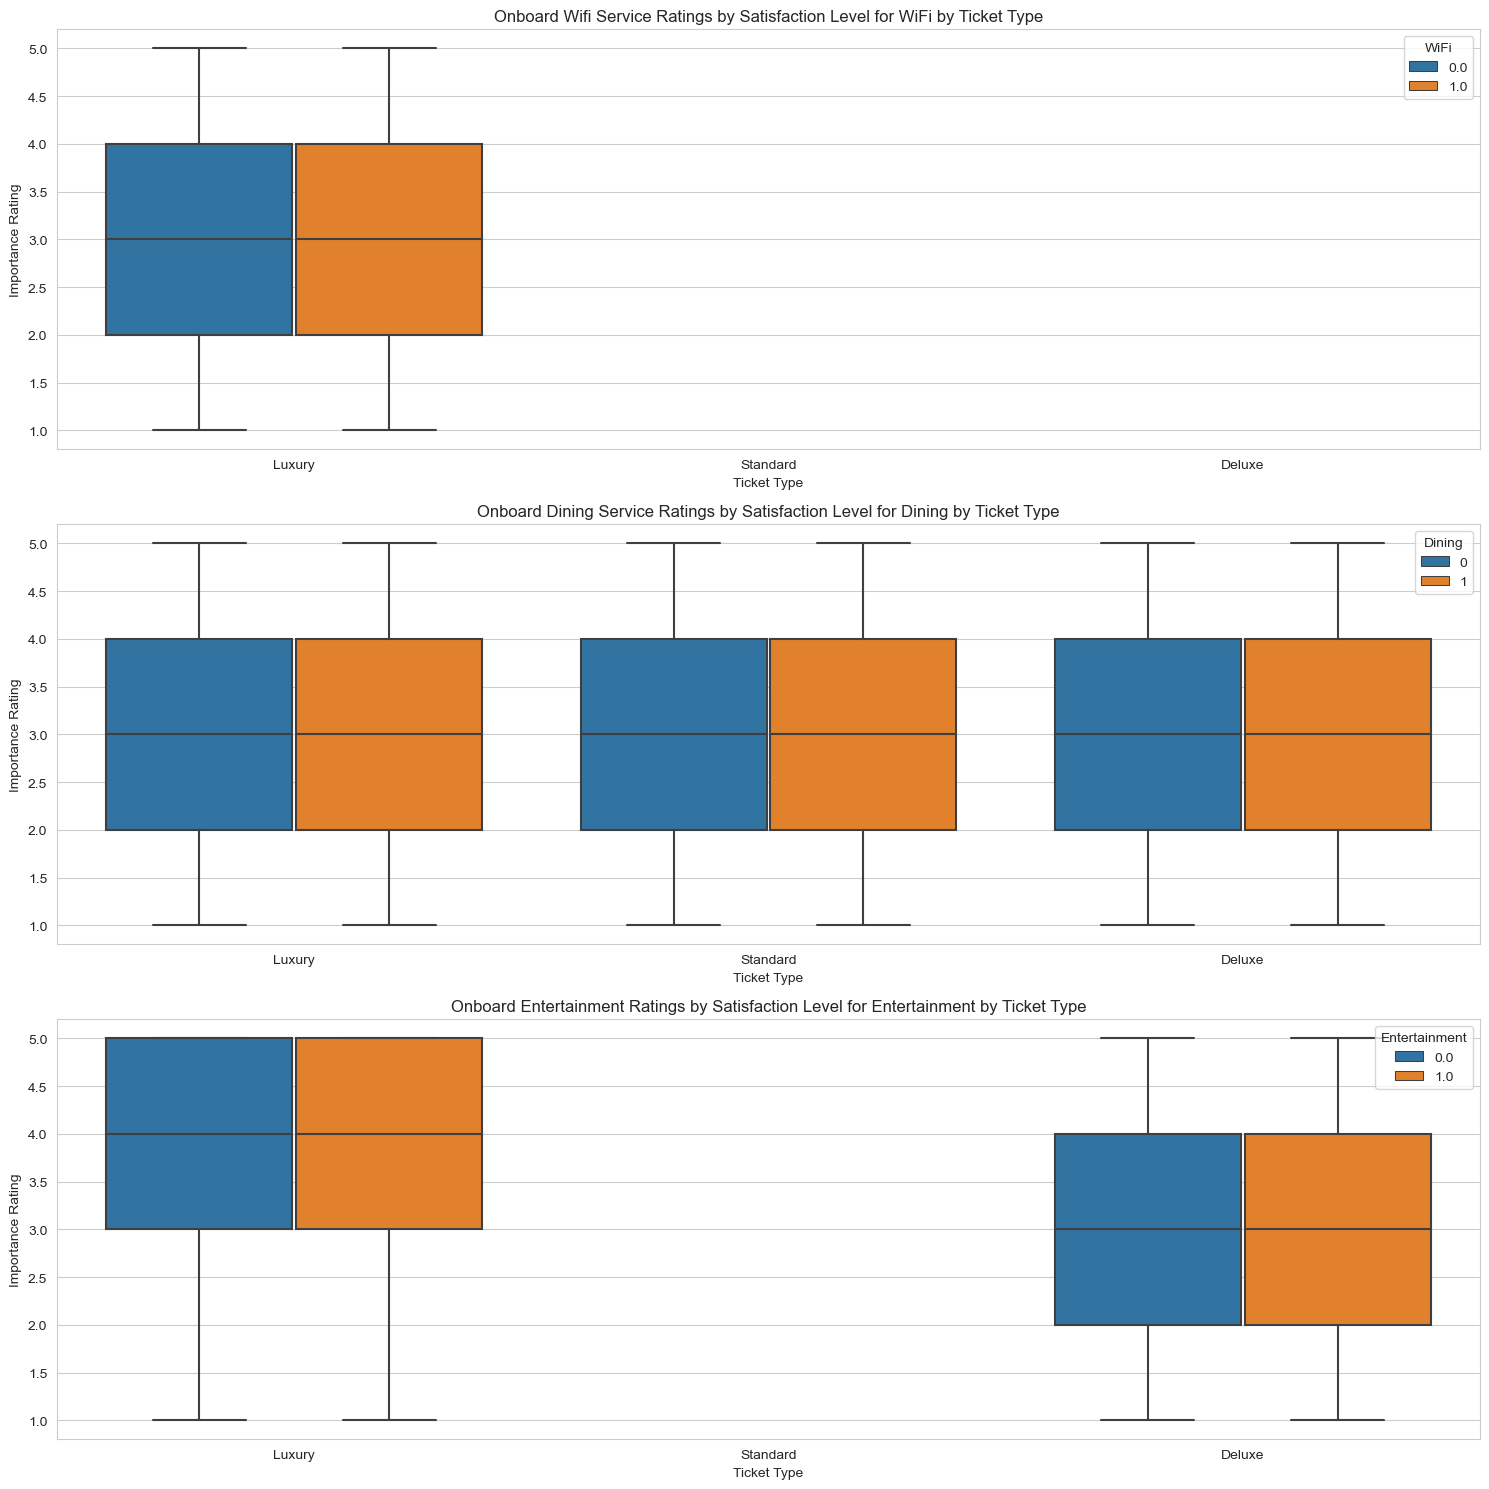

In [41]:
# Mapping of services to their corresponding importance ratings
service_to_importance = {
    'WiFi': 'Onboard Wifi Service',
    'Dining': 'Onboard Dining Service',
    'Entertainment': 'Onboard Entertainment'
}

plt.figure(figsize=(15, 15))

for i, (service, importance) in enumerate(service_to_importance.items(), 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=merged_df, x='Ticket Type', y=importance, hue=service, order=merged_df['Ticket Type'].value_counts().index)
    plt.title(f'{importance} Ratings by Satisfaction Level for {service} by Ticket Type')
    plt.ylabel('Importance Rating')
    plt.xlabel('Ticket Type')
    plt.legend(title=service, loc='upper right')
    plt.tight_layout()
plt.show()

It seems that for luxury ticket holders, Onboard Entertainment is highly regarded more frequently. Perhaps we can take this into account for future strategies. 


Exploring Ticket Types with Cruise Distance. 

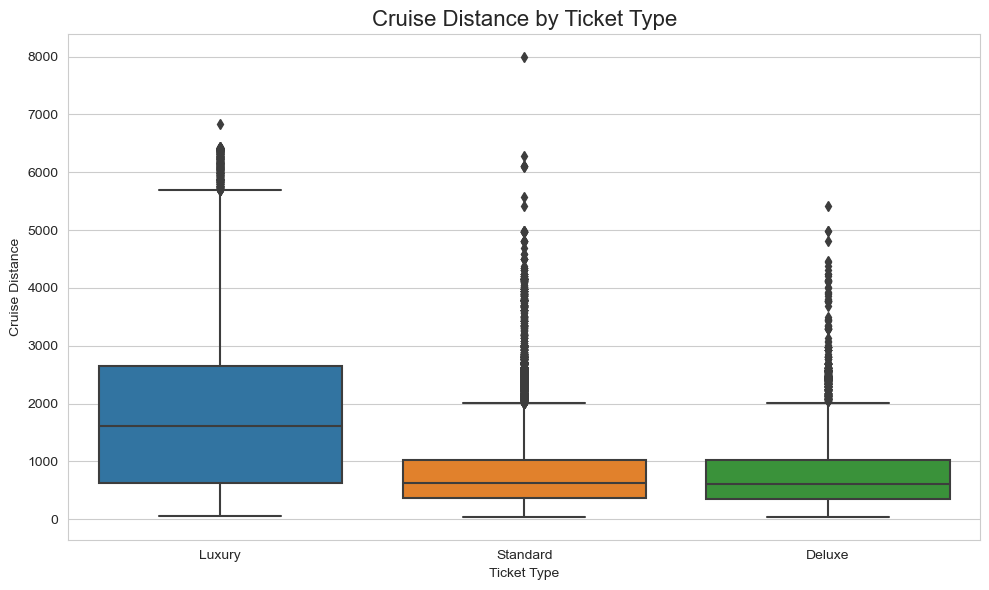

In [42]:
# Boxplot for 'Cruise Distance' by 'Ticket Type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Ticket Type', y='Cruise Distance', order=merged_df['Ticket Type'].value_counts().index)
plt.title('Cruise Distance by Ticket Type', fontsize=16)
plt.ylabel('Cruise Distance')
plt.xlabel('Ticket Type')
plt.tight_layout()
plt.show()

From the boxplots, we can observe that most customers who purchased luxury tickets travel a longer distance while standard and deluxe type generally go for short distances.

Lets check the Gender patterns of the customers for different Ticket Types. 

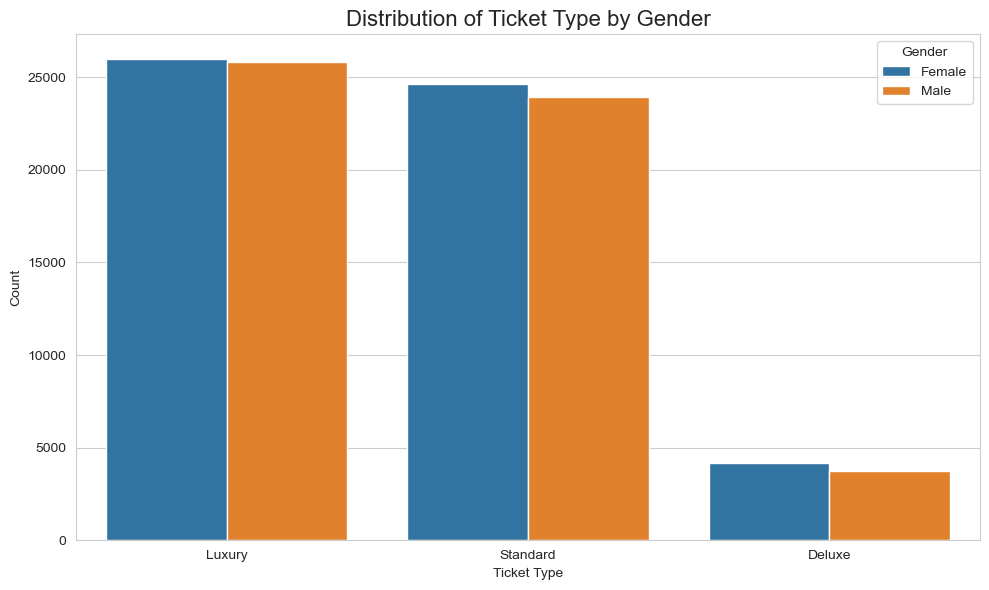

In [43]:
# Count plot for 'Ticket Type' by 'Gender'
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Ticket Type', hue='Gender', order=merged_df['Ticket Type'].value_counts().index)
plt.title('Distribution of Ticket Type by Gender', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Ticket Type')
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

There doesn't seem to have a significant difference in the genders by ticket types. 

Importance Ratings by Genders

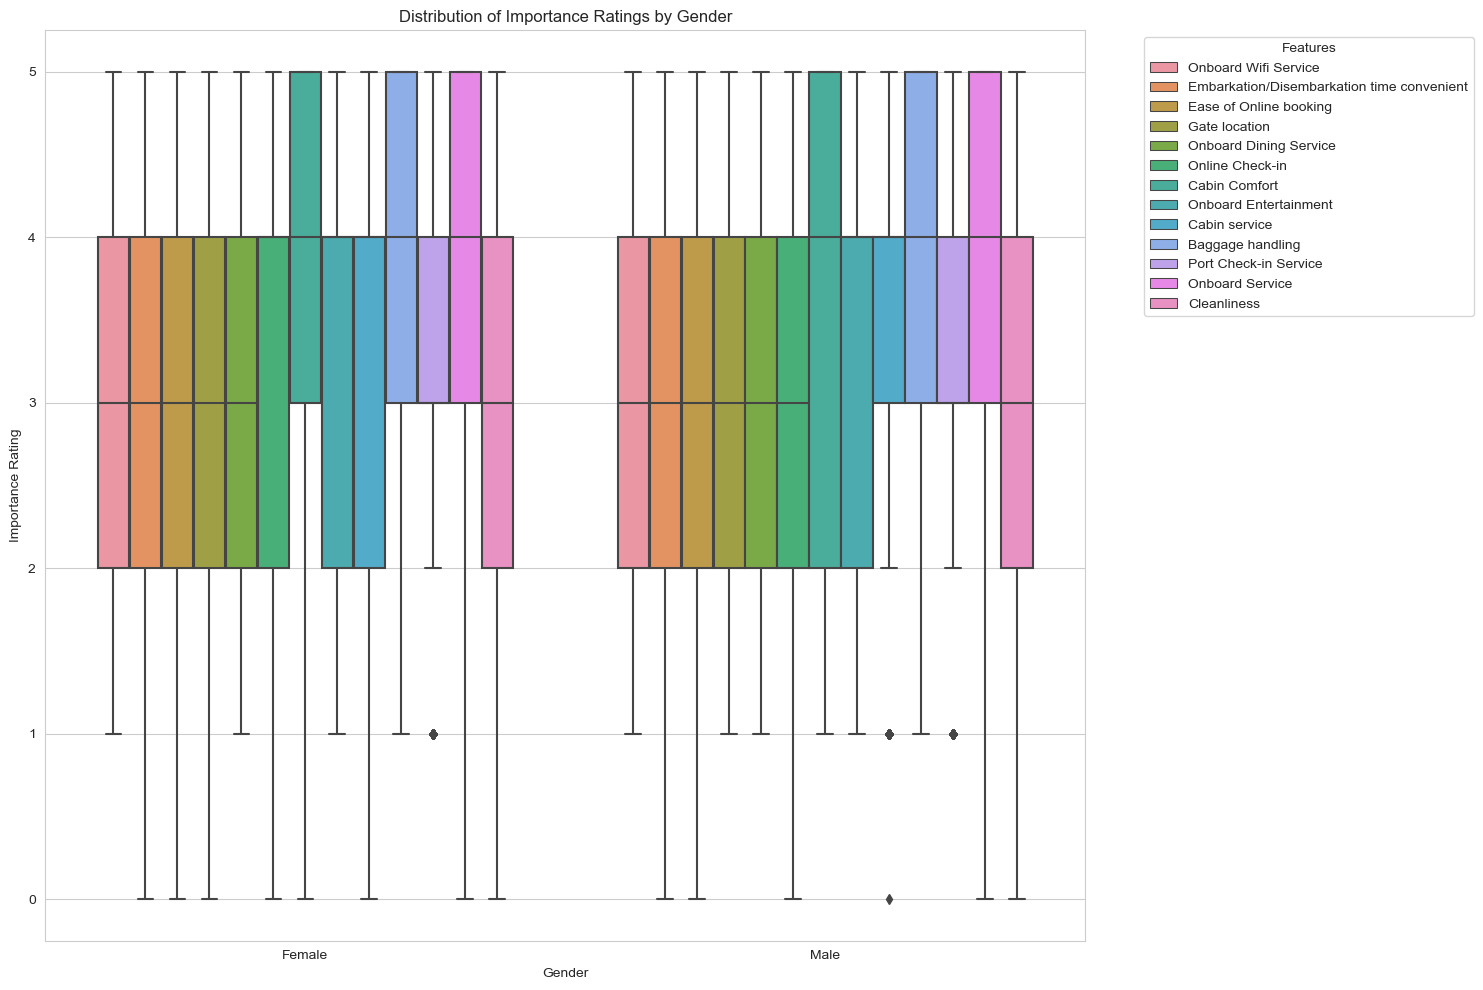

In [44]:
# Boxplot of importance ratings by Gender
melted_data_ticket = merged_df.melt(id_vars='Gender', value_vars=importance_features)
plt.figure(figsize=(15, 10))
sns.boxplot(data=melted_data_ticket, x='Gender', y='value', hue='variable')
plt.title('Distribution of Importance Ratings by Gender')
plt.ylabel('Importance Rating')
plt.xlabel('Gender')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the boxplot we observe the following;
 - Females have a higher minimum requirement for Cabin Comfort as compared to Males
 - Males have a higher minimum requirement for Cabin Service as compared to Females

---

With the gathered insights in mind, lets look at the missingness of our data again. 

<Axes: >

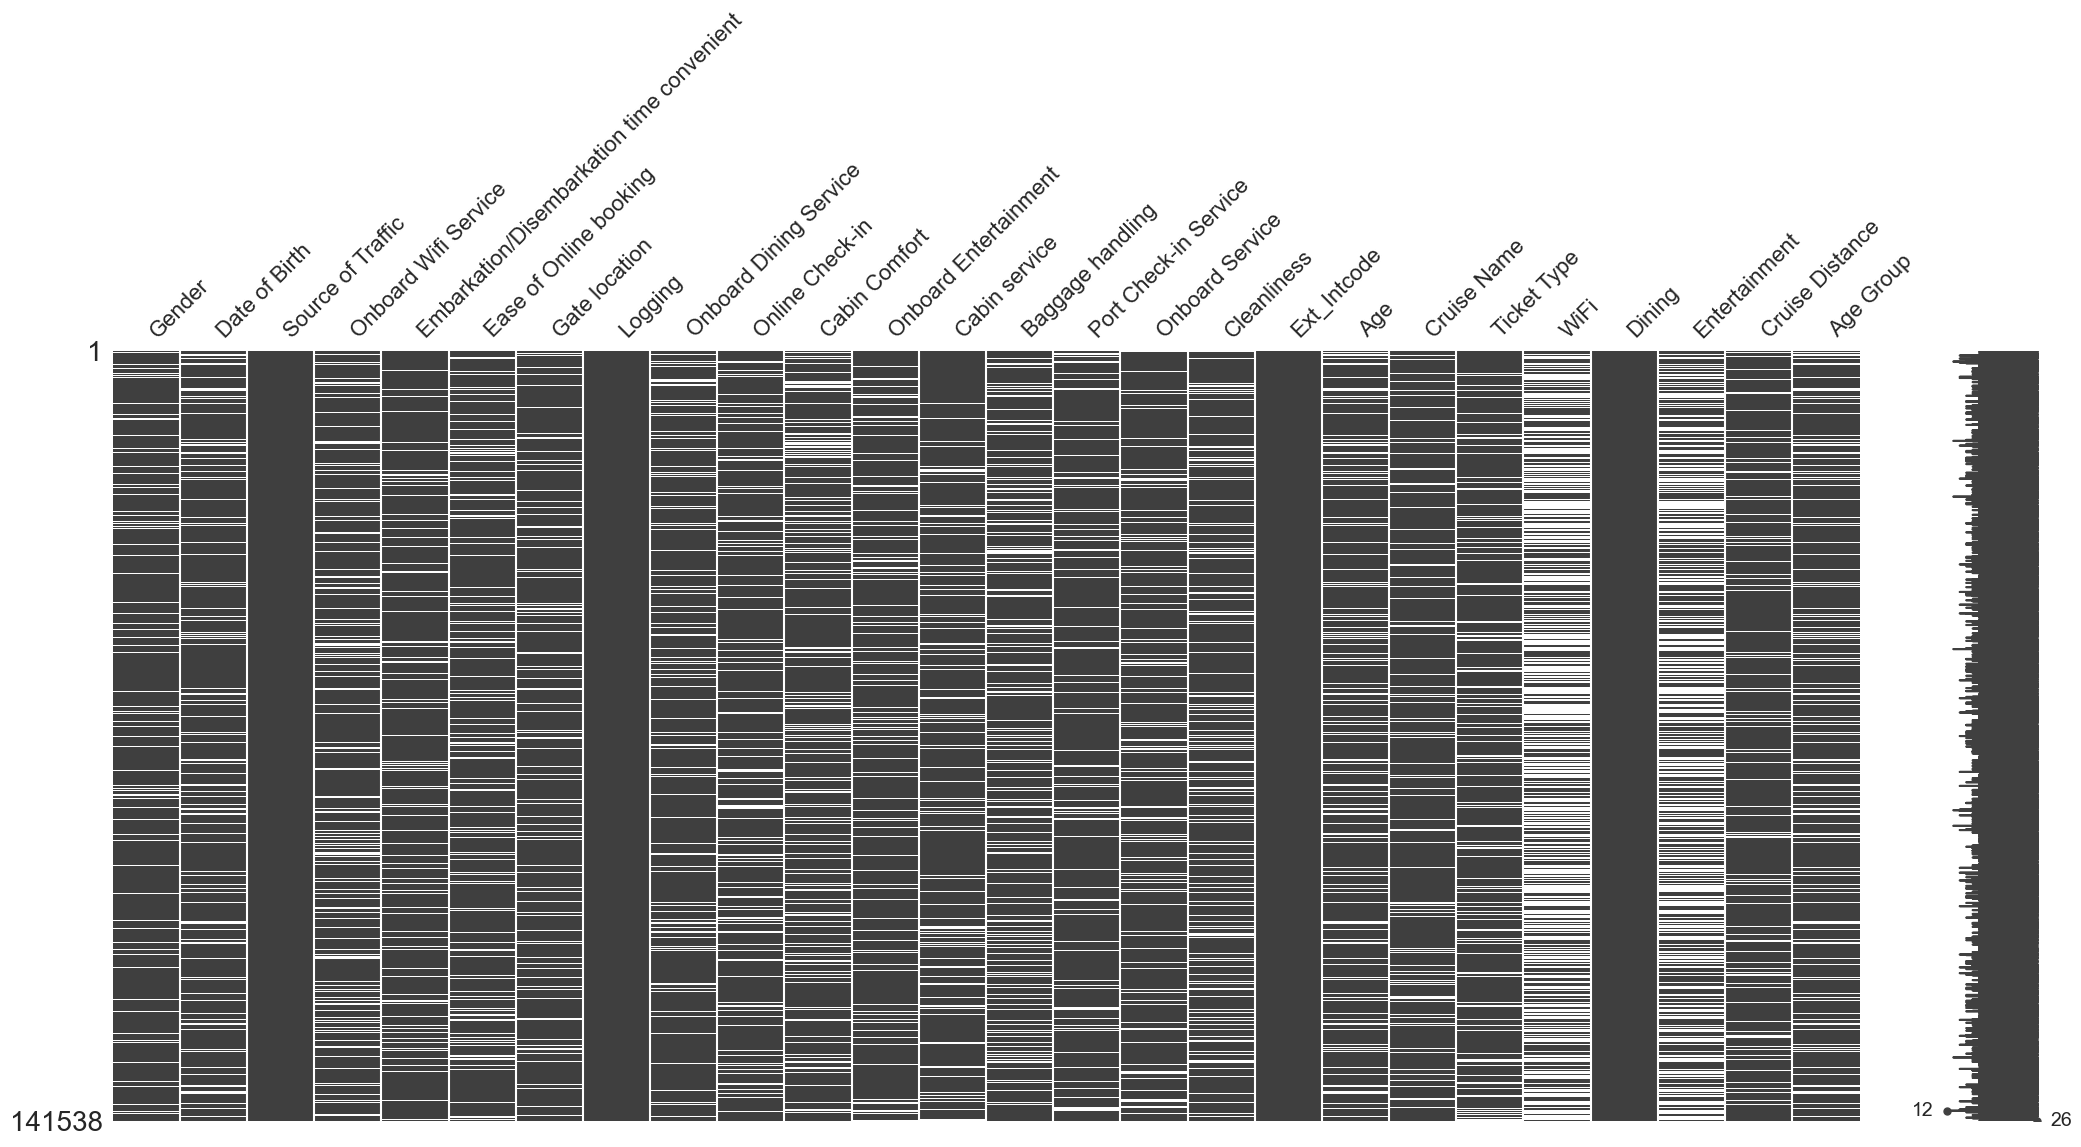

In [45]:
# Visualize missing values distribution with a matrix
msno.matrix(merged_df)

From the matrix above, it seems that missing values are most likely at random, putting aside 'WiFi' and 'Entertainment'(*due to the different offerings of the different Ticket Types*). With most of the features influencing ticket types, our target variable, and the size of our data is not large, we will fill in the missing values with KNN imputation later on. <br><br>

Saving data for use later.

In [46]:
# File path to save DataFrame as CSV file
file_path = 'data/merged_data.csv'

# Save the DataFrame to the specified file path
merged_df.to_csv(file_path, index=False)  # Set index=False to exclude the DataFrame index from the CSV

print(f"DataFrame saved to {file_path}")

DataFrame saved to data/merged_data.csv


---

### 3. Key Summary & Findings from EDA of ShipSail Data

**1. Customer Demographics:**
- The majority of potential customers come from the 31-45 and 46-60 age groups.
- There's a balanced distribution between genders.
- Most sales come from Direct Sources of Traffic.

**2. Customer Preferences:**
- Features like "Onboard Wifi Service", "Baggage Handling", "Cabin Comfort", "Onboard Dining Service", and "Cleanliness" are highly valued across all age groups.
- The 40-60 age group has higher expectations across multiple features.
- Females have a higher minimum requirement for Cabin Comfort as compared to Males, while Males have a higher minimum requirement for Cabin Service as compared to Females.

**3. Ticket Types and Services:**
- Luxury tickets include WiFi, Dining, and Entertainment; Deluxe offers Dining & Entertainment; Standard offers only Dining.
- Luxury ticket holders have higher expectations, especially for features like Online Check-in, Cabin Comfort, and Onboard Entertainment.
- Most customers who purchased luxury tickets travel longer distances.
- Number of Deluxe tickets are significantly lower(class imbalance).

**4. Marketing Insights:**
- Younger customers (18-30) are more likely to be drawn from Indirect Sources, while older age groups prefer Direct Sources.
- Luxury tickets are predominantly purchased by the 31-45 and 46-60 age groups.

**5. Data Quality and Missingness:**
- Some customers might have provided inaccurate age data, leading to unrealistic age values. We made them null and will impute them later.
- Missing data patterns in "WiFi" and "Entertainment" are most likely due to the services offered by the different ticket types, while the missingness of the other features could influence ticket types. As such, we will impute missing values with the KNN imputer.   

**6. Potential Strategies:**
- Targeted marketing campaigns can be designed for different age groups based on their preferences.
- Service & Amenities improvements can be tailored of focuses to the expectations of Luxury ticket holders.
- Further exploration of repeat customers can provide insights into brand loyalty and areas of improvement.


The target variable is the ticket type, making this a classification problem. Suitable models like Logistic Regression, Random Forest, and Gradient Boosting should be explored.